In [1]:
import pandas as pd 
from pandas.core.reshape.merge import merge

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as ndates

import warnings 
warnings.filterwarnings('ignore')

In [2]:
import plotly
 
import plotly.express as px

In [3]:
import matplotlib.dates as mdates
import datetime as dt



In [4]:
import matplotlib as mpl

# Set the path simplification threshold to 0.5
mpl.rcParams['path.simplify_threshold'] = 0.5


# Set the chunk size to 1000
plt.rcParams['agg.path.chunksize'] = 1000


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
transactions = pd.read_csv('/content/drive/MyDrive/LP2 PROJECT. TEAM PARIS/transactions.csv', index_col=["date"], parse_dates=True)

holiday= pd.read_csv('/content/drive/MyDrive/LP2 /holidays_events.csv', index_col=["date"], parse_dates=True)

oil = pd.read_csv('/content/drive/MyDrive/LP2 /oil.csv', index_col=["date"], parse_dates=True)

sample_submission = pd.read_csv('/content/drive/MyDrive/LP2 /sample_submission.csv')

stores = pd.read_csv('/content/drive/MyDrive/LP2 PROJECT. TEAM PARIS/stores.csv' )

test = pd.read_csv('/content/drive/MyDrive/LP2 /test.csv', index_col=["date"], parse_dates=True)

train = pd.read_csv('/content/drive/MyDrive/LP2 PROJECT. TEAM PARIS/train.csv', index_col=["date"], parse_dates=True)


In [7]:
# LOOK AT THE COLUMNS 

transaction_columns = transactions.head(0)
store_columns =  stores.head(0)
oil_columns =  oil.head(0)
holiday_columns = holiday.head(0)
sample_submission_columns = sample_submission.head(0)
train_cols = train.head(0)
test_cols = test.head(0)

columns_list = [transaction_columns, store_columns, oil_columns, holiday_columns , sample_submission_columns , train_cols, test_cols]

print (columns_list)



[Empty DataFrame
Columns: [store_nbr, transactions]
Index: [], Empty DataFrame
Columns: [store_nbr, city, state, type, cluster]
Index: [], Empty DataFrame
Columns: [dcoilwtico]
Index: [], Empty DataFrame
Columns: [type, locale, locale_name, description, transferred]
Index: [], Empty DataFrame
Columns: [id, sales]
Index: [], Empty DataFrame
Columns: [id, store_nbr, family, sales, onpromotion]
Index: [], Empty DataFrame
Columns: [id, store_nbr, family, onpromotion]
Index: []]


In [8]:
# CLEANING INDIVIDUAL DATASETS 


# CLEANING INDIVIDUAL DATASETS

# 1. TRANSACTION CLEANING AND UNIVARIATE ANALYSIS 

In [9]:
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83488 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_nbr     83488 non-null  int64
 1   transactions  83488 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


**There are no null values**

**The Dataset is in the correct dtype**

In [11]:
# Checking for duplicate values 

duplicates = transactions[transactions.duplicated()]

print(duplicates)

            store_nbr  transactions
date                               
2013-01-04         26           813
2013-01-04         30           689
2013-01-08         13           879
2013-01-09         51          1786
2013-01-10         19           960
...               ...           ...
2017-08-15         48          2722
2017-08-15         51          1573
2017-08-15         52          2255
2017-08-15         53           932
2017-08-15         54           802

[45955 rows x 2 columns]


## EDA ANALYSIS ON TRANSACTIONS 

In [12]:
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


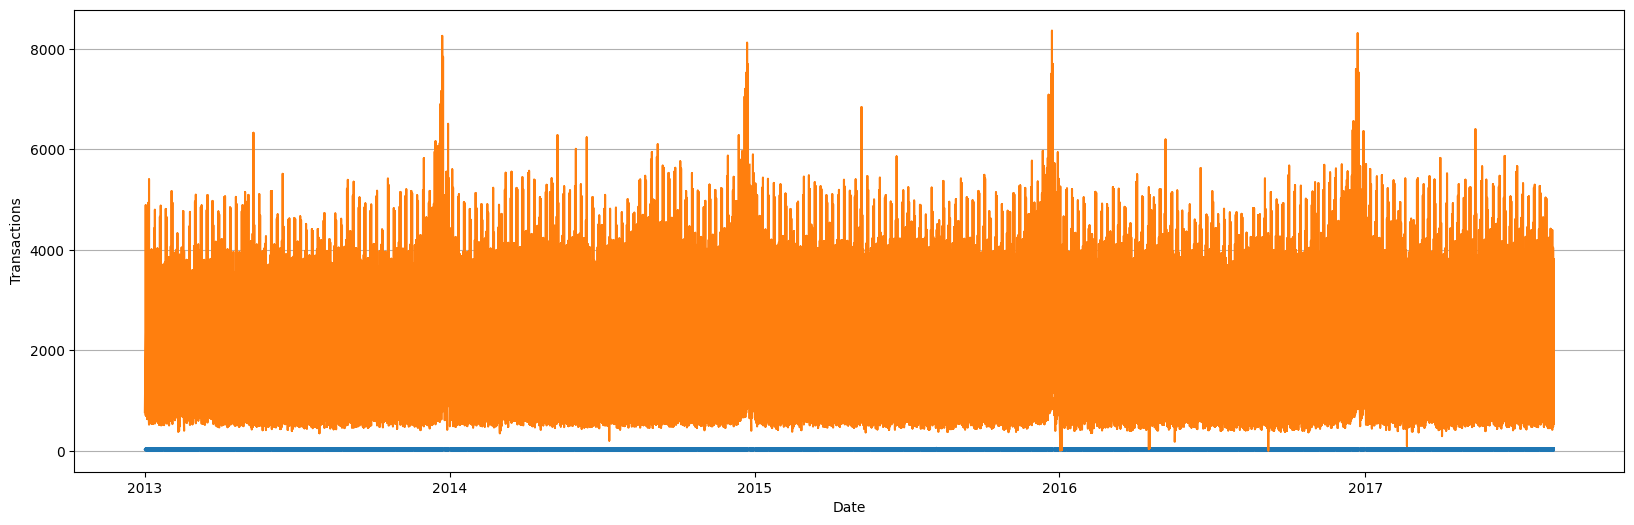

In [13]:
# Visualize the time series transactions 

plt.figure(figsize=(20, 6))
plt.plot(transactions)
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.show()

The above visualization shows the 4 year behaviour of the transactions, 

To deconjest this we can plot an yearly trend on everything , so as to observe everything. 

Text(0.5, 1.0, '2015 transactions')

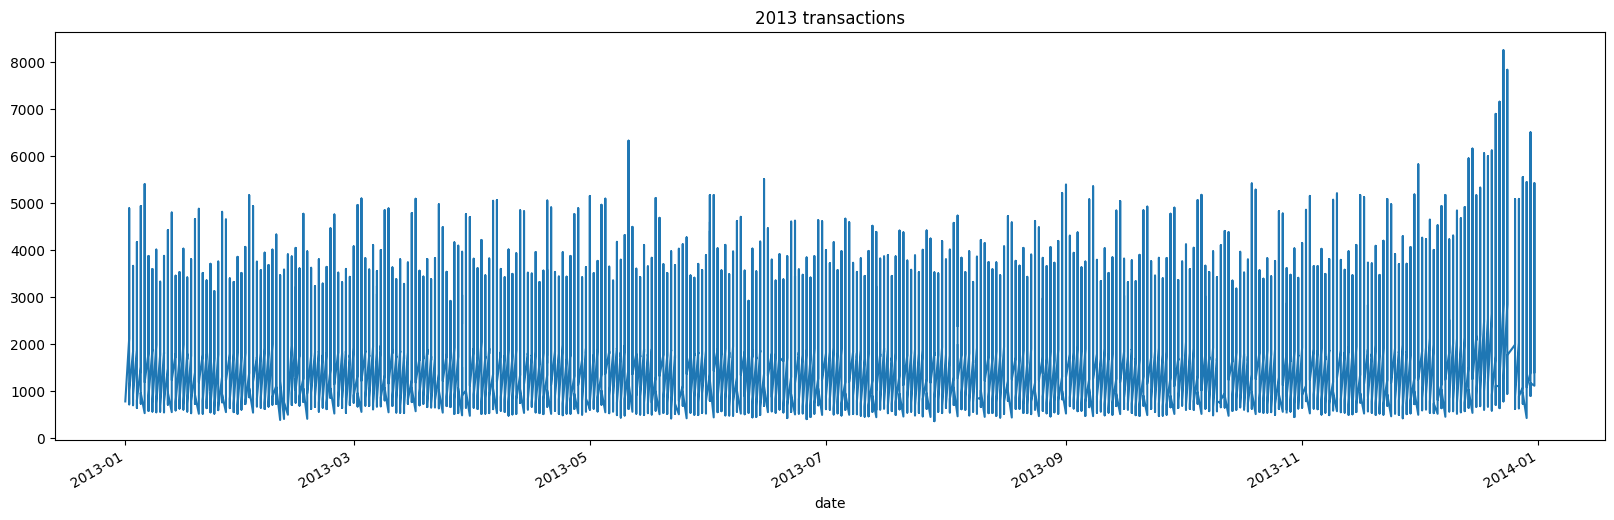

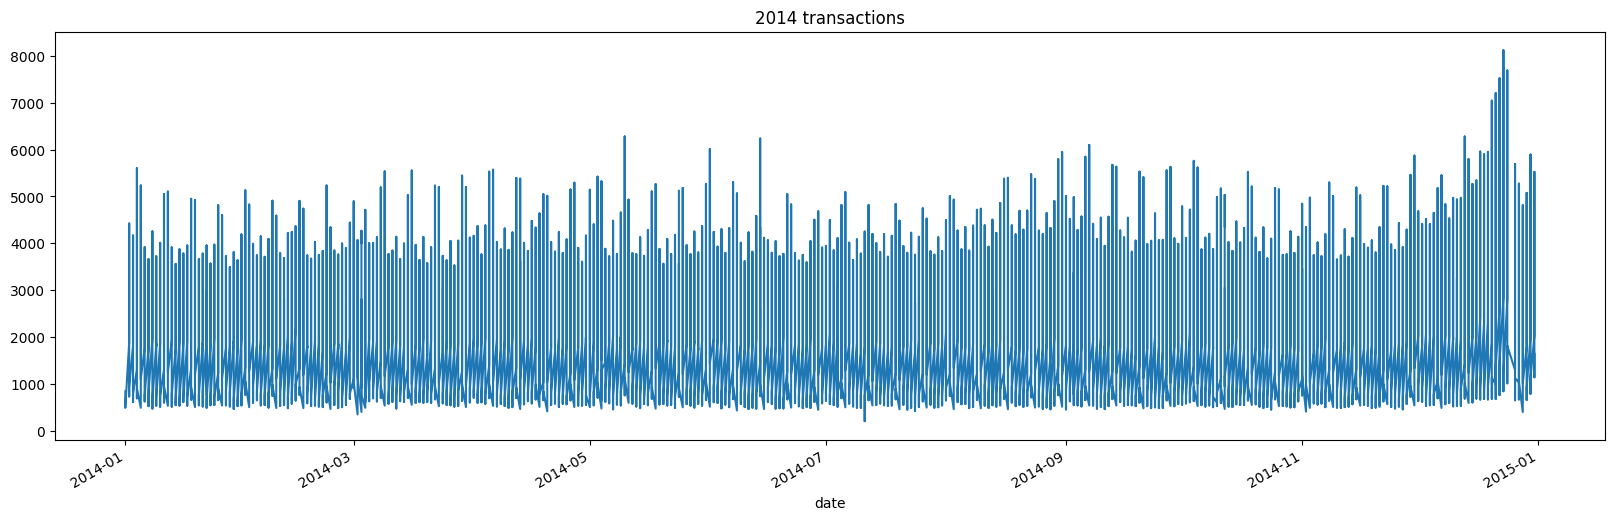

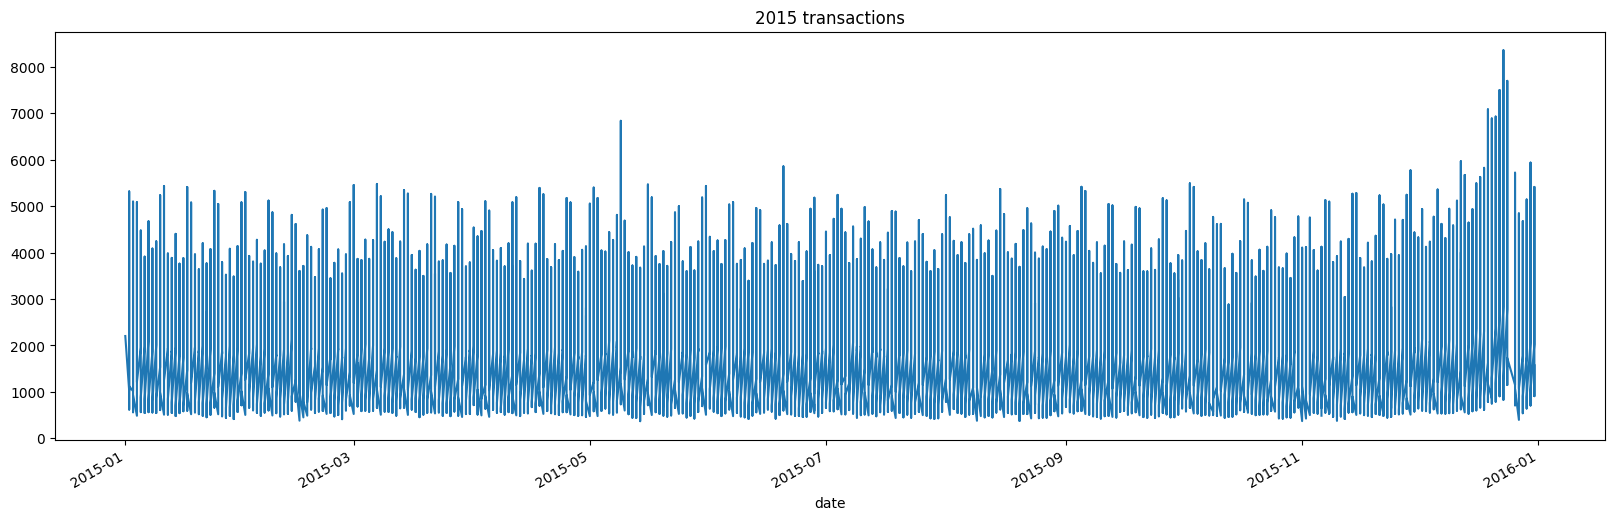

In [14]:
# Checking yearly trend 

plt.figure(figsize=(20,6))
ax = transactions.loc ['2013', 'transactions' ].plot()
#ax.set_xlabel['TRANSACTIONS IN 2013 MONTHLY']
plt.title('2013 transactions')

plt.figure(figsize=(20,6))
ax = transactions.loc ['2014', 'transactions' ].plot()
#ax.set_xlabel['TRANSACTIONS IN 2014 MONTHLY']
plt.title('2014 transactions')

plt.figure(figsize=(20,6))
ax = transactions.loc ['2015', 'transactions' ].plot()
#ax.set_xlabel['TRANSACTIONS IN 2015 MONTHLY']
plt.title('2015 transactions')

There's a general trend in our 

**PLOT HISTOGRAM OF THE TRANSACTION COLUMN DISTRIBUTION**

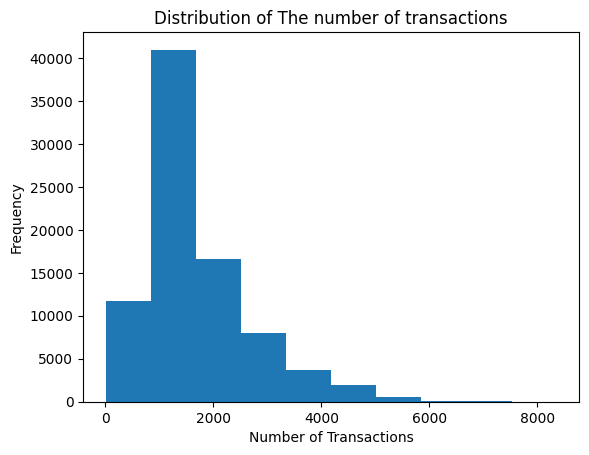

In [15]:

#fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(transactions['transactions'])
plt.title('Distribution of The number of transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

## Use a scatter plot to see the distribution

In [16]:
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


**LOOK AT THE DATE COLUMNS WITH MOST TRANSACTIONS** 

In [17]:
most_transactions = transactions.groupby('date')['transactions'].sum().reset_index()
most_transactions = most_transactions.sort_values(by = 'transactions', ascending = False)

most_transactions.head(20)

,date,transactions
1085,2015-12-24,171169
1448,2016-12-24,167542
1447,2016-12-23,156932
721,2014-12-24,156546
357,2013-12-24,155846
1084,2015-12-23,153338
356,2013-12-23,145876
720,2014-12-23,144513
1083,2015-12-22,138921
1446,2016-12-22,138892


**Observations**

1. There's a spike in the number of transactions at the begining of every year.

   i.e; The highest number of transactions are experienced at the end of every year
   

2. There is a general steady seasonality in our dataset, Since there's a recurring pattern in our dataset


3. Of the top 20 highest transactions , **all were in december, EXCEPT 13th May 2017**, we'll fasttrack and see what holiday was there on that day

# 2. STORE CLEANING AND UNIVARIATE ANALYSIS

In [18]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [19]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [20]:
stores['store_nbr'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [21]:
# Checking for duplicate values 

store_duplicate = stores[stores.duplicated()]



In [22]:
print (store_duplicate)

Empty DataFrame
Columns: [store_nbr, city, state, type, cluster]
Index: []


1. No null values 
2. cluster column is not categorical but continuous

### UNIVARIATE ANALYSIS

In [23]:
stores['state'].value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [24]:
store_ = stores['state'].value_counts()

In [25]:
store_ 

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

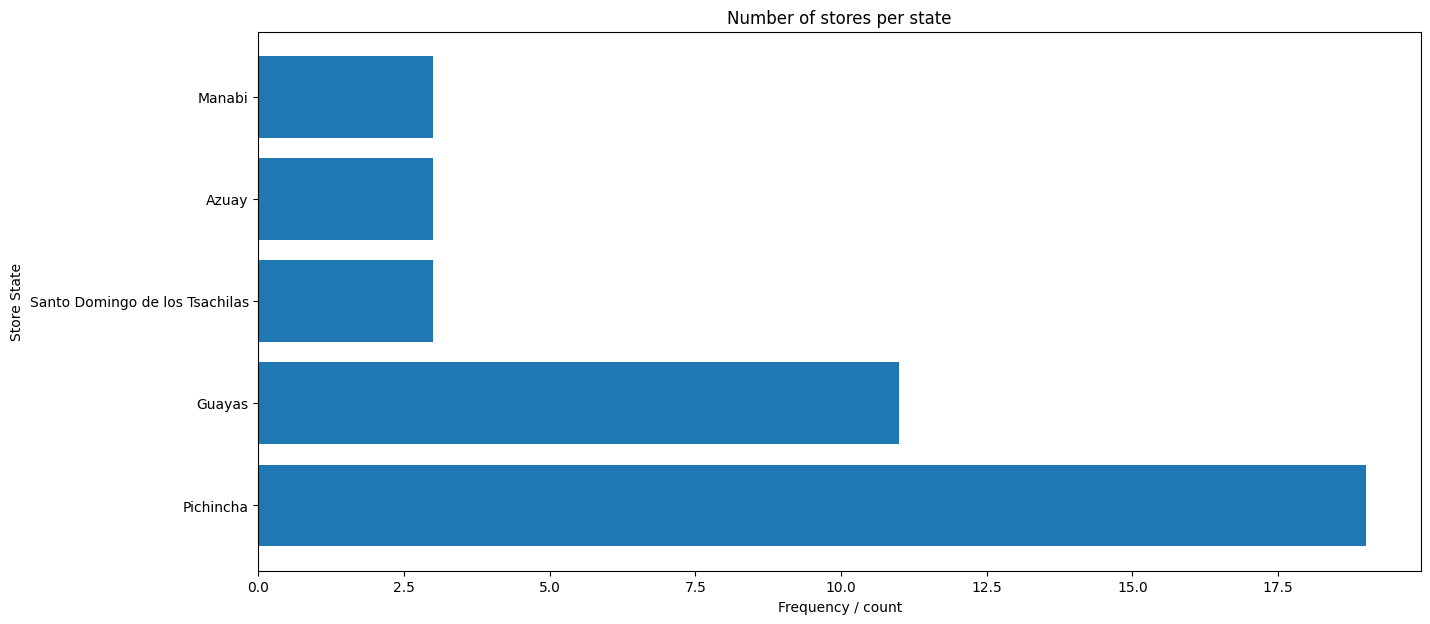

In [26]:

plt.figure(figsize=(15, 7))
plt.barh(store_.head(5).index , store_.head(5).values )
plt.title('Number of stores per state')
plt.xlabel('Frequency / count')
plt.ylabel('Store State')
plt.show()


In [27]:
stores['state'].value_counts().sum()

54

The State with the highest count in this case tells us the state with the most store which happens to be **Pichincha** with a total of **19 Stores** 

We have a total of 54 stores and 16 locations, One location however **boasts of 19 of the 54 stores, I.e, 35% of all the stores are in this location**  This suggests that this area **'Pinchincha** has a high traffic that explains its suitability to the stores location. 

# 3. OIL CLEANING AND UNIVARIATE ANALYSIS

In [28]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [29]:
oil.shape

(1218, 1)

In [30]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [31]:
# Rename 'dcoilwitco' to 'DC-OIL-WICTO-CORPORATION'

oil.rename(columns = {'dcoilwitco':'DC-OIL-WICTO-CORPORATION'}, inplace = True)

In [32]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [33]:
oil['dcoilwtico'].isna().sum()

43

Issues with our Data 

1. 43 missing values in the **'dcoilwtico'** column
2. Set the date as the index
3. Rename **dcoilwtco** column
4. Change the dtype of the Date column

## FILL 43 MISSING VALUES

In [34]:
# Check the range of the values within that column

oil['dcoilwtico'].tail(20)

date
2017-08-04    49.57
2017-08-07    49.37
2017-08-08    49.07
2017-08-09    49.59
2017-08-10    48.54
2017-08-11    48.81
2017-08-14    47.59
2017-08-15    47.57
2017-08-16    46.80
2017-08-17    47.07
2017-08-18    48.59
2017-08-21    47.39
2017-08-22    47.65
2017-08-23    48.45
2017-08-24    47.24
2017-08-25    47.65
2017-08-28    46.40
2017-08-29    46.46
2017-08-30    45.96
2017-08-31    47.26
Name: dcoilwtico, dtype: float64

In [35]:
with pd.option_context('display.max_rows', None):
    print(oil['dcoilwtico'])

date
2013-01-01       NaN
2013-01-02     93.14
2013-01-03     92.97
2013-01-04     93.12
2013-01-07     93.20
2013-01-08     93.21
2013-01-09     93.08
2013-01-10     93.81
2013-01-11     93.60
2013-01-14     94.27
2013-01-15     93.26
2013-01-16     94.28
2013-01-17     95.49
2013-01-18     95.61
2013-01-21       NaN
2013-01-22     96.09
2013-01-23     95.06
2013-01-24     95.35
2013-01-25     95.15
2013-01-28     95.95
2013-01-29     97.62
2013-01-30     97.98
2013-01-31     97.65
2013-02-01     97.46
2013-02-04     96.21
2013-02-05     96.68
2013-02-06     96.44
2013-02-07     95.84
2013-02-08     95.71
2013-02-11     97.01
2013-02-12     97.48
2013-02-13     97.03
2013-02-14     97.30
2013-02-15     95.95
2013-02-18       NaN
2013-02-19     96.69
2013-02-20     94.92
2013-02-21     92.79
2013-02-22     93.12
2013-02-25     92.74
2013-02-26     92.63
2013-02-27     92.84
2013-02-28     92.03
2013-03-01     90.71
2013-03-04     90.13
2013-03-05     90.88
2013-03-06     90.47
2013-03-

In [36]:
oil['dcoilwtico'].mean()

67.71436595744682

In [37]:
oil['dcoilwtico'].median()

53.19

**NB**

 Since our dataset is arranged almost in **an ascending order / descending order** , For our missing values we will fill in with the previous value since they are almost the same, The mean / median will skew our dataset 

In [38]:
oil['dcoilwtico'].fillna( method = 'ffill', inplace = True)

In [39]:
# our first value we will fill with the previous value

oil['dcoilwtico'].isna().sum()

1

In [40]:
oil['dcoilwtico'].fillna( 93.14 , inplace = True)

In [41]:

oil['dcoilwtico'].isna().sum()

0

### OIL EDA UNIVARIATE ANALYSIS

In [42]:
oil.head()

,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


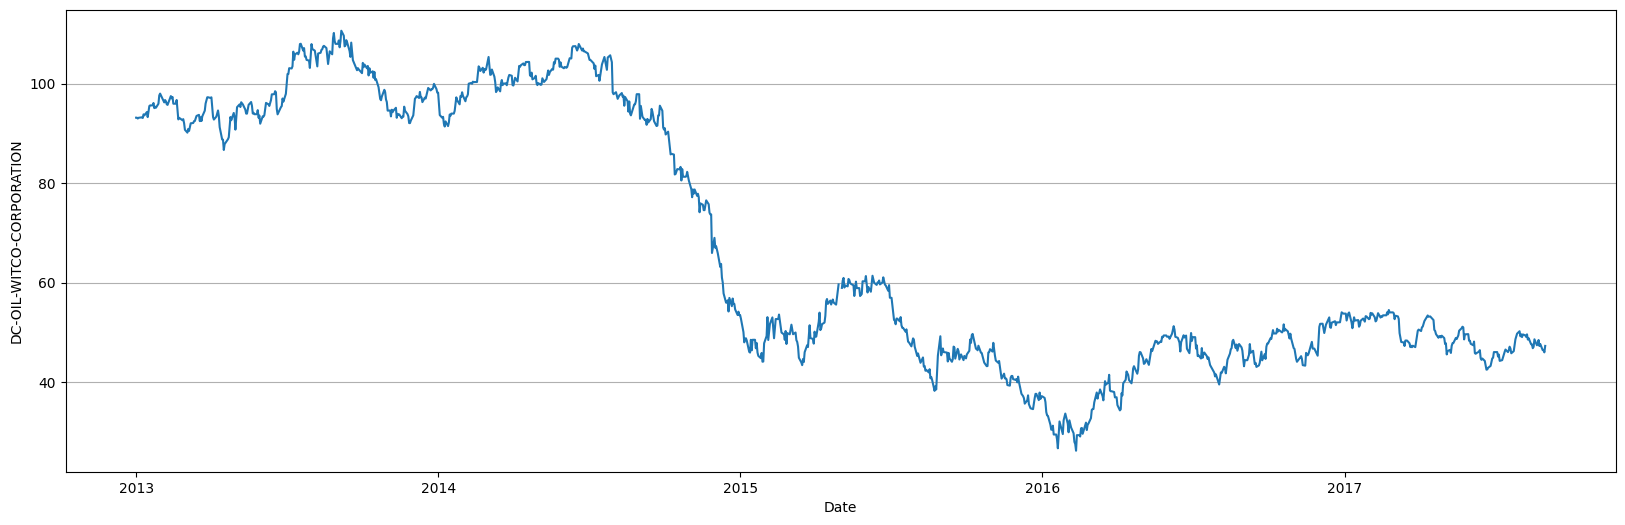

In [43]:
plt.figure(figsize=(20, 6))
plt.plot(oil)
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("DC-OIL-WITCO-CORPORATION")
plt.show()

**CHECK FOR NORMAL VARIANCE IN THE DATASET, TO SEE THE DIFFERENCE TOWARDS END OF 2015**

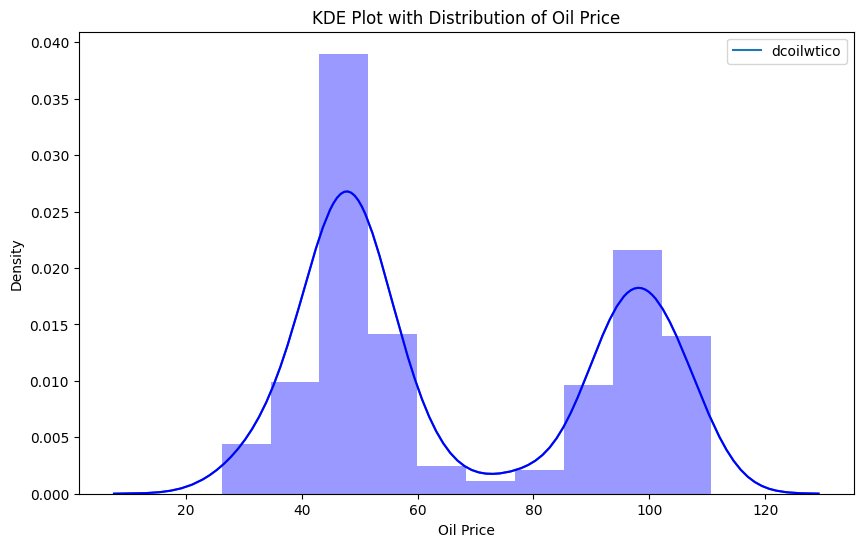

In [44]:
#Plotting a KDE with Distribution of the oil prices
fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=oil, shade=False)
sns.distplot(oil, hist=True, rug=False, color='blue', label='Distribution')

# set plot parameters
plt.title('KDE Plot with Distribution of Oil Price')
plt.xlabel('Oil Price')
plt.ylabel('Density')

# show the plot
plt.show()

**Observations**

1. There has been a general decrease **trend** over the years , with the sharp decrease peak experienced **at the end of 2014 year**


2. Depending on each year in our dataset's average, there has been a **seasonality mid year** where the oil prices go up. 
   I.e, the highest oil prices have been experienced mid year
   
   
3. The KDE Variance, for the price of the oil, fell below the threshhold drastically. 

# 4. SAMPLE_SUBMISSION CLEANING 

In [45]:
sample_submission.shape

(28512, 2)

In [46]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [47]:
sample_submission.isna().sum()

id       0
sales    0
dtype: int64

# 5. HOLIDAY EVENTS CLEANING 

In [48]:
holiday.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [49]:
holiday.isna().sum()

type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [50]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2012-03-02 to 2017-12-26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         350 non-null    object
 1   locale       350 non-null    object
 2   locale_name  350 non-null    object
 3   description  350 non-null    object
 4   transferred  350 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 14.0+ KB


In [51]:
# Check for the holidays 

unique_holidays = holiday['type'].unique()
print(unique_holidays)

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']


In [52]:
local_ = holiday.loc[holiday['locale'] == 'Local']

regional_ = holiday.loc[holiday['locale'] == 'Regional']

national_ =  holiday.loc[holiday['locale'] == 'National']


print ('Number of local holidays ', local_.shape)
print ('Number of regional holidays ', regional_.shape)
print ('Number of national holidays ', national_.shape)

Number of local holidays  (152, 5)
Number of regional holidays  (24, 5)
Number of national holidays  (174, 5)


### HOLIDAY UNIVARIATE ANALYSIS 

**1. Ratio of HolidayTransferred to Holiday not transferred**

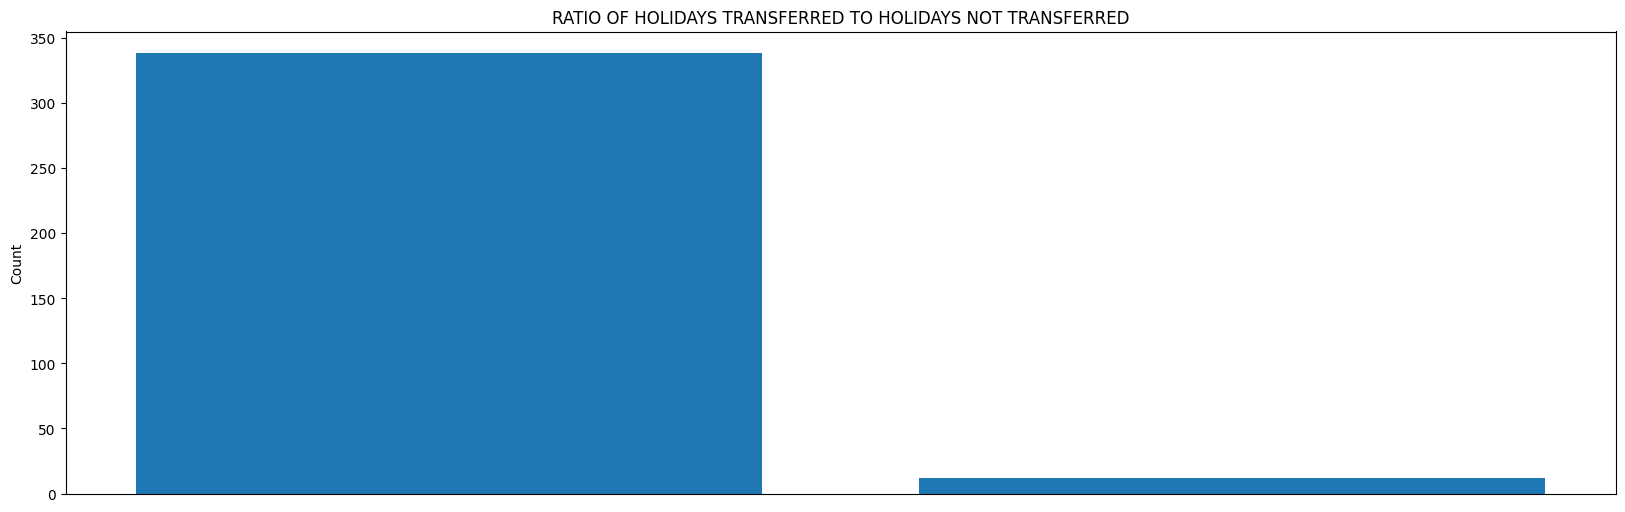

In [53]:
# Create a bar chart of the boolean variable
plt.figure(figsize=(20, 6))
counts = holiday['transferred'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('RATIO OF HOLIDAYS TRANSFERRED TO HOLIDAYS NOT TRANSFERRED')
plt.xticks([])
plt.ylabel('Count')
plt.show()

.


Since the holidays are clustered, We will have a look at the ditribution of the individual type of holiday



**2. Type of holday transfered**


.

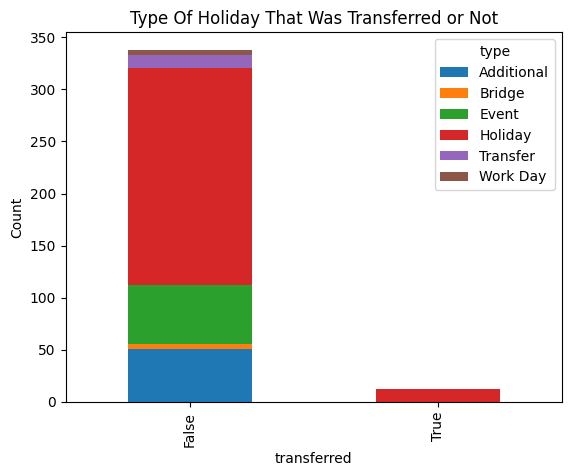

In [54]:
# Create a stacked bar chart of the boolean variable and a categorical variable
contingency_table = pd.crosstab(holiday['transferred'], holiday['type'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Type Of Holiday That Was Transferred or Not')
plt.ylabel('Count')
plt.show()


**_Both plots show the relationship between the holiday and wheather it was transferred or not.
The first plot shows the total count of holidays that were transferred from a weekend to a weekday. It shows that there were more holidays that were  not transfered than the the holidays that were._**

**_The second plot indicates the type of holiday that were not transferred against those that were transferred. We can tell from the legend that most of the holidyas which were not transferred were public holidays which fell on a weekday. Also the type of holidays that got transferred were also public holidays and this may incude but not limited to Easter holdays, Ramadan holidays, Christmas holidays etc._**

.


**3. See the holday frequency distribution**


.

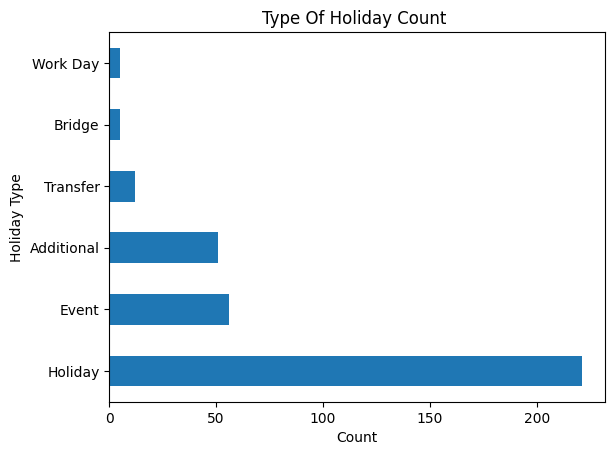

In [55]:
# Plotting a count of the type of holiday
holiday['type'].value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Holiday Type')
plt.title('Type Of Holiday Count ')
plt.show()

# 6. TRAIN and TEST  DATASET

## a) Train

In [56]:
train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [57]:
train.isna().sum()

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


## b) Test 

In [59]:
test.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [60]:
test.isna().sum()

id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   store_nbr    28512 non-null  int64 
 2   family       28512 non-null  object
 3   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


# POINTS TO NOTE 

1. **SPLITTING DATASETS** 

  Because we have both have test and train datasets, we will merge the datasets before splitting our training datasets into 80:20
  
  
2. **X AND Y variables**

   Since we will be predicting sales, sales will be our y variables. 

# Merge our datasets 

**1. Holiday on Train**

In [62]:
# Merge holiday_events on train data

train1 =train.merge(holiday , on='date', how='left')

train1.head(1)

,id,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
date,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False


**2. oil on Train 1** 

In [63]:
# Merge oil on train data

train2 = train1.merge(oil, on='date', how = 'left')

train2.head(2)

,id,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
date,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14
2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14


**3. Train 2 on Transaction**

In [64]:
# Merge on date and store_nbr 

train4 =train2.merge(transactions, on=['date','store_nbr'] , how='left')

train4.head(3)

,id,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,transactions
date,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN
2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN
2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN


**4. Train on Transaction**

In [65]:
# Merge stores on the train data 

# Reset the index to prevent the datecolumn from "dissapearing"

In [66]:
train5 = pd.merge(train4.reset_index(), stores, how='left', on='store_nbr')


train5.head(2)

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [67]:
# Checking the shape of our final training set 

In [68]:
train5.shape

(3054348, 17)

# QUESTIONS AND HYPOTHESIS 

## 1. Is the train dataset complete ?

### a) All columns populated

In [69]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [70]:
train5.isna().sum()

date                  0
id                    0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       878526
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
dtype: int64

In [71]:
null_vals = {
            'store_nbr': 0, 
             'family' : 0,
             'onpromotion' : 0, 
             'type_x' : 2551824, 
             'locale' : 2551824, 
             'locale_name' : 2551824, 
             'description' : 2551824, 
             'transferred' : 2551824,
             'DC-OIL-WITCO' : 878526, 
             'city' : 0, 
             'state' : 0, 
             'type_y' : 0, 
             'cluster' : 0
    
            }

null_valls = pd.DataFrame([null_vals])

In [72]:
null_valls.T

,0
store_nbr,0
family,0
onpromotion,0
type_x,2551824
locale,2551824
locale_name,2551824
description,2551824
transferred,2551824
DC-OIL-WITCO,878526
city,0


## 1 b) Is the train dataset complete

### The date column has all the dates

In [73]:
train5.head(2)

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [74]:
dates = pd.DataFrame (train5.index)

dates.head()

,0
0,0
1,1
2,2
3,3
4,4


In [75]:
train5['date']

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3054343   2017-08-15
3054344   2017-08-15
3054345   2017-08-15
3054346   2017-08-15
3054347   2017-08-15
Name: date, Length: 3054348, dtype: datetime64[ns]

In [76]:

# Declare the beginning and the end 
start_ = train5['date'].min()
end_ = train5['date'].max()

#create a range with start date to the end date
date_range = pd.date_range (start_ , end_ , freq='D')

#check for missing dates 
missing_dates = date_range[~date_range.isin(train5['date'])]

pd.DataFrame (missing_dates)

,0
0,2013-12-25
1,2014-12-25
2,2015-12-25
3,2016-12-25


For our dataset spanning from 2013 to 2017 , **all the christmass dates are missing.**

Let's try another method so as to confirm our results 

## 2. Which dates have the lowest and highest sales for each year?



In [77]:
train5

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,3000883,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6
3054344,2017-08-15,3000884,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6
3054345,2017-08-15,3000885,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6
3054346,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6


In [78]:


sales_ = train5.groupby('sales').sum()
sales_ = sales_.sort_values(by = 'sales', ascending = False)

In [79]:
sales2_ = train5['sales'].sort_values( ascending = False)

In [80]:
sales2_.head(10)

2194017    124717.000
2488752     89576.360
2171292     87438.516
2171293     87438.516
2166429     76090.000
2181543     63434.000
2173074     53874.000
2173075     53874.000
569724      46271.000
1273284     45361.000
Name: sales, dtype: float64

**we'll group per year, then get the highest and lowest per year** 

In [81]:
year_2013 = {'Highest' : [46271, '11th December', '2013-11-12'], 
              'Lowest' : [0, '1st Jnuary', '2013-01-01']
            }

year_2014 = {'Highest' : [45361, '8th December', '2014-12-08 '], 
              'Lowest' : [0, '9th April', '2014-09-04']
            }

year_2015 = {'Highest' : [40351.460, '14th December', '2015-12-14'], 
              'Lowest' : [0, 'none ', 'none  ']
            }

year_2016 = {'Highest' : [124717, '2nd May', '2016-05-02'], 
              'Lowest' : [0, '15th Aug', '2016-08-15'   ]
            }

year_2017 = {'Highest' : [38422.625, '2nd April', '2017-04-02'], 
              'Lowest' : [ 16,   '15th Aug' , '2017-08-15' ] 
            }

In [82]:
print ('\33[1mFor 2013' +" \33[1m" , pd.DataFrame([year_2013]).T)
print('\n')
print ('For 2014' , pd.DataFrame([year_2014]).T)
print('\n')
print ('For 2015' , pd.DataFrame([year_2015]).T)
print('\n')
print ('For 2016' , pd.DataFrame([year_2016]).T)
print('\n')
print ('For 2017' , pd.DataFrame([year_2017]).T)

For 2013                                            0
Highest  [46271, 11th December, 2013-11-12]
Lowest          [0, 1st Jnuary, 2013-01-01]


For 2014                                           0
Highest  [45361, 8th December, 2014-12-08 ]
Lowest           [0, 9th April, 2014-09-04]


For 2015                                              0
Highest  [40351.46, 14th December, 2015-12-14]
Lowest                      [0, none , none  ]


For 2016                                      0
Highest  [124717, 2nd May, 2016-05-02]
Lowest       [0, 15th Aug, 2016-08-15]


For 2017                                           0
Highest  [38422.625, 2nd April, 2017-04-02]
Lowest           [16, 15th Aug, 2017-08-15]


Text(0.5, 1.0, 'Highest sales per year')

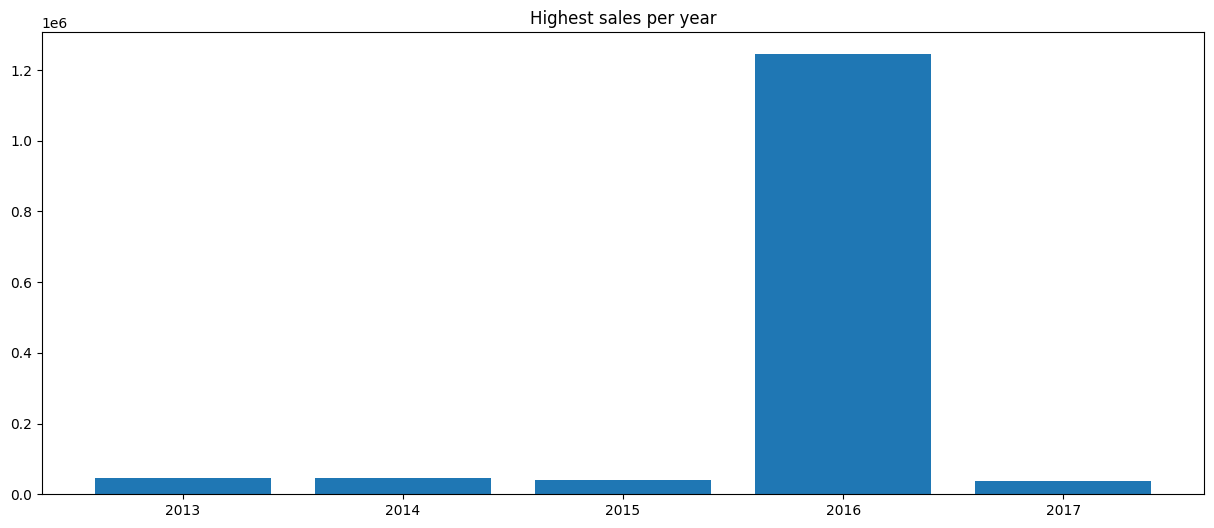

In [83]:
x = [2013, 2014, 2015, 2016, 2017]
y = [46271, 45361, 40351, 1244717, 38422]

plt.figure(figsize=(15,6))
plt.bar(x, y, label='Bars1')
plt.title('Highest sales per year')



## 3. Did the earthquake impact sales?

|

The Earthquake happened in **2016-04-16**


Because the number of days before the earthquake are/may not be the same as the number of days after the earthquake, we will use the **aggregate mean** to see. 


As an additive to better understand the impact of the earthquake, we can compare the **highest amount before and after the earthquake**

In [84]:
# store the earthquake year in a variable, convert to correct format
earthquake_ = pd.to_datetime ('2016-04-16')

#Get sales mean before earthquake 
sales_before_earthquake = train5[train5['date'] < earthquake_] ['sales'].mean()


#Get sales mean after earthquake 
sales_after_earthquake = train5[train5['date'] > earthquake_] ['sales'].mean()




**Aggregate mean before and after the earthquake**

In [85]:
print ('sales before earthquake : ', sales_before_earthquake )

print ('\n sales after earthquake : ', sales_after_earthquake )

sales before earthquake :  314.7514160421047

 sales after earthquake :  466.16909466413665


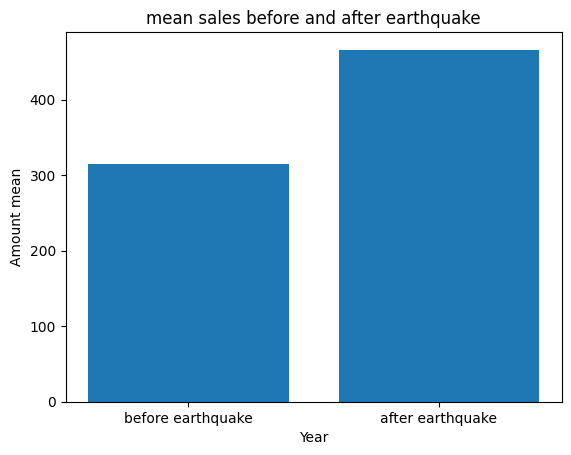

In [86]:
# Plot average mean before and after earthquake 

year = ['before earthquake', 'after earthquake']

mean_sales = [sales_before_earthquake, sales_after_earthquake ] 


plt.xlabel('Year')
plt.ylabel('Amount mean')
plt.title("mean sales before and after earthquake")

plt.bar(  year , mean_sales)

plt.show()

**percentage difference**

In [87]:
total = sales_before_earthquake + sales_after_earthquake

perc_increase = sales_after_earthquake * 100 / sales_before_earthquake

increase = perc_increase - 100

print ('percentage increase after earthquake : ', increase)

percentage increase after earthquake :  48.107068278217554


In [88]:
perc_increase = sales_after_earthquake / sales_before_earthquake

perc_increase * 100

148.10706827821755

The earthquake has seriously impacted the oil sales and transactions, since the drastic downfall at the end of 2015. The sales has never **reached half of the average peak** just before the earthquake. 

## 5. Are certain groups of stores selling more products? (Cluster, city, state, type)



In [89]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


### a) By City


### b) By State 


### c) By type 

SOLUTION
.
.
.
.
.


## a) By State

In [90]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [91]:
stores_per_city = train5['state'].value_counts()

In [92]:
# Stores per city

pd.DataFrame(stores_per_city)

print('NUMBER OF STORES PER CITY \n', pd.DataFrame(stores_per_city))

NUMBER OF STORES PER CITY 
                                   state
Pichincha                       1074678
Guayas                           622182
Santo Domingo de los Tsachilas   169686
Azuay                            169686
Manabi                           169686
Cotopaxi                         113124
Tungurahua                       113124
Los Rios                         113124
El Oro                           113124
Chimborazo                        56562
Imbabura                          56562
Bolivar                           56562
Pastaza                           56562
Santa Elena                       56562
Loja                              56562
Esmeraldas                        56562


In [93]:
pichincha = train5.loc[train5['state']=='Pichincha']
Guayas = train5.loc[train5['state']=='Guayas']
Santo = train5.loc[train5['state']=='Santo']
Azuay = train5.loc[train5['state']=='Azuay']
Cotopaxi = train5.loc[train5['state']=='Cotopaxi']
Tungurahua= train5.loc[train5['state']=='Tungurahua']
Los_Rios = train5.loc[train5['state']=='Los Rios']
El_Oro = train5.loc[train5['state']=='El Oro']
Chimborazo = train5.loc[train5['state']=='Chimborazo']
Imbabura = train5.loc[train5['state']=='Imbabura']
Bolivar = train5.loc[train5['state']=='Bolivar']
Pastaza = train5.loc[train5['state']=='Pastaza']
Santa_Elena = train5.loc[train5['state']=='Santa Elena']
Loja = train5.loc[train5['state']=='Loja']
Esmeraldas = train5.loc[train5['state']=='Esmeraldas']


In [94]:
a = pichincha['sales'].sum()
b = Guayas['sales'].sum()
c = Santo['sales'].sum()
d = Azuay['sales'].sum()
e = Cotopaxi['sales'].sum()
f = Tungurahua['sales'].sum()
g = Los_Rios['sales'].sum()
h = El_Oro['sales'].sum()
i = Chimborazo['sales'].sum()
j = Imbabura['sales'].sum()
k = Bolivar['sales'].sum()
l = Pastaza['sales'].sum()
m = Santa_Elena['sales'].sum()
n = Loja['sales'].sum()
o = Esmeraldas['sales'].sum()

In [95]:
salesVSnumber = pd.DataFrame ( [["pichincha" , 1074678,  a] ,
                       ["Guayas" , 622182 , b] ,
                       ["Santo" , 169686, c],
                       ["Azuay" , 169686 , d],
                    ["Cotopaxi" , 169686, e], 
                      ["Tungurahua" , 113124, f], 
                      ["Los_Rios" , 113124, g], 
                      ["El_Oro" , 113124, h] ,
                      ["Chimborazo" , 113124, i],
                      ["Imbabura" , 56562, j],
                      ["Bolivar" , 56562, k] ,
                      ["Pastaza" , 56562, l] ,
                      ["Santa_Elena" , 56562, m] ,
                      ["Loja" , 56562, n],
                      ["Esmeraldas" , 56562, o]], columns = ['name of state', 'number of stores', 'amount']
)
#pd.DataFrame([sales_stateVSsales])
salesVSnumber

,name of state,number of stores,amount
0,pichincha,1074678,5.975859e+08
1,Guayas,622182,1.686500e+08
2,Santo,169686,0.000000e+00
3,Azuay,169686,5.019405e+07
4,Cotopaxi,169686,2.160778e+07
5,Tungurahua,113124,4.115977e+07
6,Los_Rios,113124,3.261164e+07
7,El_Oro,113124,3.409467e+07
8,Chimborazo,113124,1.161044e+07
9,Imbabura,56562,1.166691e+07


In [96]:
fig = px.bar( salesVSnumber, x = 'name of state', y = 'amount', color='number of stores', barmode = 'group')

fig.show()

### b) By City

In [97]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [98]:
train5['city'].unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [99]:
train5['city'].value_counts()

Quito            1018116
Guayaquil         452496
Santo Domingo     169686
Cuenca            169686
Latacunga         113124
Manta             113124
Machala           113124
Ambato            113124
Quevedo            56562
Esmeraldas         56562
Loja               56562
Libertad           56562
Playas             56562
Daule              56562
Babahoyo           56562
Cayambe            56562
Salinas            56562
Puyo               56562
Guaranda           56562
Ibarra             56562
Riobamba           56562
El Carmen          56562
Name: city, dtype: int64

In [100]:
Quito  = train5.loc[train5['city']=='Quito']
Guayaquil =   train5.loc[train5['city']=='Guayaquil']     
Santo_Domingo =   train5.loc[train5['city']=='Santo Domingo']    
Cuenca  =  train5.loc[train5['city']=='Cuenca ']        
Latacunga =   train5.loc[train5['city']=='Latacunga']       
Manta      =   train5.loc[train5['city']=='Manta']        
Machala   =   train5.loc[train5['city']=='Machala']         
Ambato   =   train5.loc[train5['city']=='Ambato']         
Quevedo    =   train5.loc[train5['city']=='Quevedo']         
Esmeraldas   =   train5.loc[train5['city']=='Esmeraldas']       
Loja     =   train5.loc[train5['city']=='Loja']           
Libertad     =   train5.loc[train5['city']=='Libertad']       
Playas    =   train5.loc[train5['city']=='Playas']          
Daule    =   train5.loc[train5['city']=='Daule']           
Babahoyo  =   train5.loc[train5['city']=='Babahoyo']          
Cayambe   =   train5.loc[train5['city']=='Cayambe']          
Salinas   =   train5.loc[train5['city']=='Salinas']          
Puyo      =   train5.loc[train5['city']=='Puyo']          
Guaranda    =   train5.loc[train5['city']=='Guaranda']        
Ibarra      =   train5.loc[train5['city']=='Ibarra']        
Riobamba  =   train5.loc[train5['city']=='Riobamba']  
El_Carmen =   train5.loc[train5['city']=='El_Carmen'] 

In [101]:
#GET SUM PER CITY

A= Quito['sales'].sum()             
B = Guayaquil['sales'].sum()        
C =  Santo_Domingo['sales'].sum()     
D = Cuenca['sales'].sum()           
E = Latacunga['sales'].sum()        
F  = Manta['sales'].sum()             
G = Machala['sales'].sum()          
H  = Ambato['sales'].sum()          
I  =Quevedo['sales'].sum()           
J =Esmeraldas['sales'].sum()        
K =Loja['sales'].sum()             
L =Libertad['sales'].sum()           
M =Playas['sales'].sum()             
N =Daule['sales'].sum()             
O =Babahoyo['sales'].sum()          
P =Cayambe['sales'].sum()            
Q =Salinas['sales'].sum()            
R =Puyo['sales'].sum()             
S =Guaranda['sales'].sum()           
T =Ibarra['sales'].sum()            
U =Riobamba ['sales'].sum()          
V =El_Carmen ['sales'].sum()       


In [102]:
sales_per_state = pd.DataFrame ( [["Quito" , A] ,
                       ["Guayaqui" , B] ,
                       ["Santo_Domingo" ,  C],
                       ["Cuenca" , D],
                    ["Latacunga" , E], 
                      ["Manta" , F], 
                      ["Machala" , G], 
                      ["Ambato" ,  I] ,
                      ["Quevedo" ,i],
                      ["Esmereldas" , J],
                      ["Loja" , K] ,
                      ["Libertad" , L] ,
                      ["Playas" ,  M] ,
                      ["Daule" ,  N],
                      ["Babahoyo" , O],
                      ["Cayambe" ,  P],
                      ["Salinas" , Q],
                      ["Puyo" , R],
                      ["Guaranda" , S],
                      ["Ibarra" , T],
                      ["Riobamba" , U],
                      ["El Carmen" , V]], columns = ['city',  'amount'])

sales_per_state

,city,amount
0,Quito,5.686793e+08
1,Guayaqui,1.255722e+08
2,Santo_Domingo,3.661757e+07
3,Cuenca,0.000000e+00
4,Latacunga,2.160778e+07
5,Manta,1.432667e+07
6,Machala,3.409467e+07
7,Ambato,1.447138e+07
8,Quevedo,1.161044e+07
9,Esmereldas,1.672204e+07


<Axes: title={'center': ' amount per city'}, xlabel='amount', ylabel='city'>

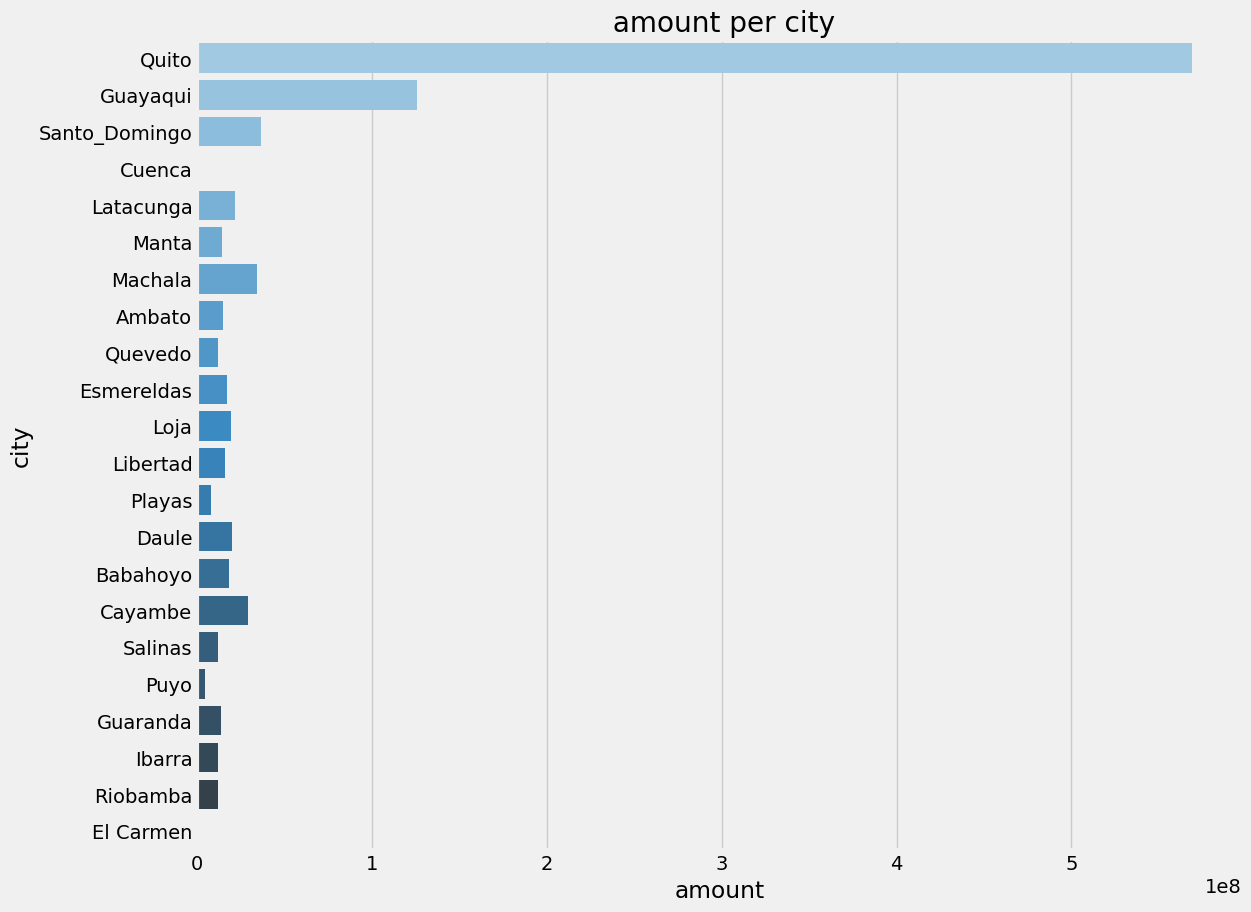

In [103]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title(' amount per city')
sns.barplot (y = "city", x = "amount", palette="Blues_d", saturation = 2.75,    data = sales_per_state)

In [104]:
sales_per_state.head()

,city,amount
0,Quito,5.686793e+08
1,Guayaqui,1.255722e+08
2,Santo_Domingo,3.661757e+07
3,Cuenca,0.000000e+00
4,Latacunga,2.160778e+07


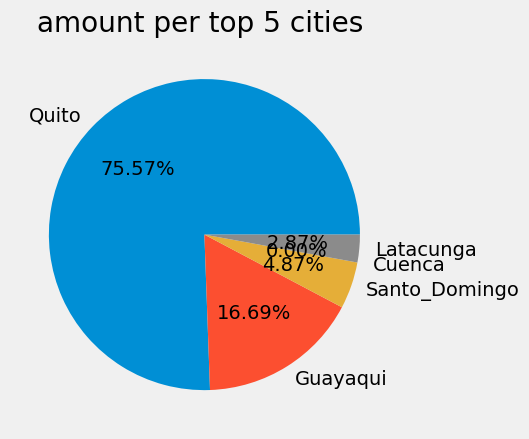

In [105]:
city = sales_per_state['city'].head()

amount = sales_per_state['amount'].head()

plt.title('amount per top 5 cities ')
plt.pie(x= amount, labels= city, autopct='%.2f%%')

plt.show()

## a) SALES BY TYPE

In [106]:
train5

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,3000883,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6
3054344,2017-08-15,3000884,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6
3054345,2017-08-15,3000885,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6
3054346,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0,Quito,Pichincha,B,6


In [107]:
train5['type_y'].value_counts()

D    1018116
C     848430
A     509058
B     452496
E     226248
Name: type_y, dtype: int64

In [108]:
# Get specific cols
type_A  = train5.loc[train5['type_y']=='A']
type_B  = train5.loc[train5['type_y']=='B']
type_C  = train5.loc[train5['type_y']=='C']
type_D  = train5.loc[train5['type_y']=='D']
type_E  = train5.loc[train5['type_y']=='E']

In [109]:
# Get sum of the specific columns 
type_A_sales = type_A['sales'].sum()
type_B_sales = type_B['sales'].sum()
type_C_sales = type_C['sales'].sum() 
type_D_sales = type_D['sales'].sum() 
type_E_sales = type_E['sales'].sum()

<BarContainer object of 5 artists>

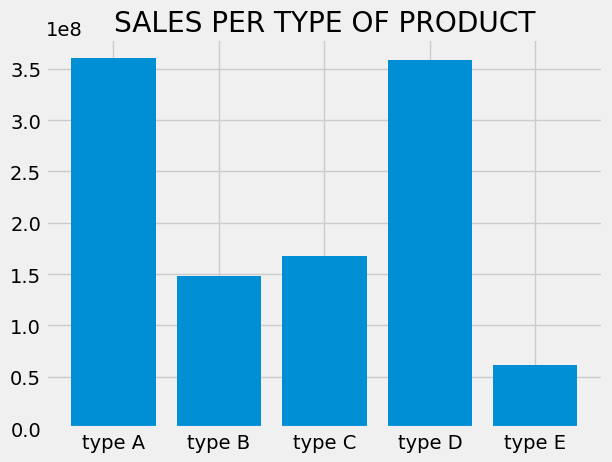

In [110]:
x = ['type A', 'type B', 'type C', 'type D', 'type E']

y = [type_A_sales, type_B_sales , type_C_sales, type_D_sales, type_E_sales]

plt.title('SALES PER TYPE OF PRODUCT')
plt.bar( x , y)

## 5. Are sales affected by promotions and holidays?


## a) Holidays

## b) Promotion

#### a) Holiday


**We shall group the sales per holiday, then as a test we still have the total sales so that we can compate the impact**

In [111]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [112]:
holiday_sales  = train5.loc[train5['type_x']=='Holiday']

#work_sal = train3.loc[train3['type_x']=='Work Day']

overal_sales = train5['sales'].sum()

print ( 'The sales per Holiday', holiday_sales['sales'].sum() )
print ( 'The Overall sales , Holday inclusive ', overal_sales)

The sales per Holiday 109222667.92241667
The Overall sales , Holday inclusive  1096574744.2062502


Find the perecentage of Holdy sales against total sales

In [113]:
sales = 109222667 / 1096574744 

sales*100

9.960348585230594

To be sure on the impact of total sales, We will plot sales of diifferent days , so as to see the impact

In [114]:
train5['type_x'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [115]:
holiday_sales  = train5.loc[train5['type_x']=='Holiday']

work_day_sales = train5.loc[train5['type_x']=='Work Day']

additional_day_sales = train5.loc[train5['type_x']=='Additional']

event_sales = train5.loc[train5['type_x']=='Event']

trasfer_sales = train5.loc[train5['type_x']=='Transfer']

bridge_sales = train5.loc[train5['type_x']=='Bridge']

In [116]:
aa=holiday_sales['sales'].sum()
bb=work_day_sales['sales'].sum()
cc=additional_day_sales['sales'].sum()
dd=event_sales['sales'].sum()
ee=trasfer_sales['sales'].sum()
ff=bridge_sales['sales'].sum()

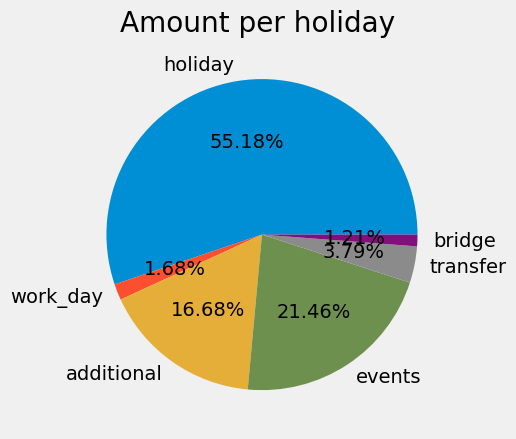

In [117]:
labels = ['holiday', 'work_day', 'additional', 'events', 'transfer', 'bridge']
amount = [aa , bb , cc , dd , ee , ff ]

plt.title('Amount per holiday ')
plt.pie(x= amount, labels= labels, autopct='%.2f%%')

plt.show()

In [118]:
# print a dataframe of the same for mathematical analysis


labels = ['holiday', 'work_day', 'additional', 'events', 'transfer', 'bridge']
amount = [aa , bb , cc , dd , ee , ff ]

percentage_ = pd.DataFrame([ 
                             ['total', overal_sales, "100%"],
                             ['holiday', aa, '9.9%' ], 
                             ['work_day', bb, '0.3%'],
                             ['additional', cc, '3.0'], 
                             ['events', dd, '3.9%'], 
                             ['transfer', ee, '0.7%'],
                             ['bridge', ff, '0.2']],
                             columns=['holiday', 'amount', 'percentage against total sales'])

percentage_


,holiday,amount,percentage against total sales
0,total,1.096575e+09,100%
1,holiday,1.092227e+08,9.9%
2,work_day,3.315924e+06,0.3%
3,additional,3.302028e+07,3.0
4,events,4.247747e+07,3.9%
5,transfer,7.501824e+06,0.7%
6,bridge,2.388330e+06,0.2


In [119]:
print('Elly Okumu')

Elly Okumu


## b) Promotion

In [120]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [121]:
train5['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [122]:
train5['onpromotion'].value_counts().head(30)

0     2428528
1      178763
2       81141
3       46928
4       32453
5       25148
6       22579
7       19348
8       15924
9       14144
10      12824
11      11262
12       9855
13       8642
14       7398
15       6548
16       5982
17       5344
18       4942
19       4576
20       4477
21       4189
22       3763
23       3477
24       3284
25       2964
29       2930
27       2925
28       2910
30       2880
Name: onpromotion, dtype: int64

**1. Promotion is evenly distributed therefore doesn't affect oursales signicantly**



**2. There was however a spike in 2016, 'EARTHQUAKE YEAR', to mean under normal circumstances , Promotion is evenly distributed to the sales**


**3. HOWEVER, there has been a slow and steady increase in the number of promotions received**

<Axes: xlabel='date', ylabel='onpromotion'>

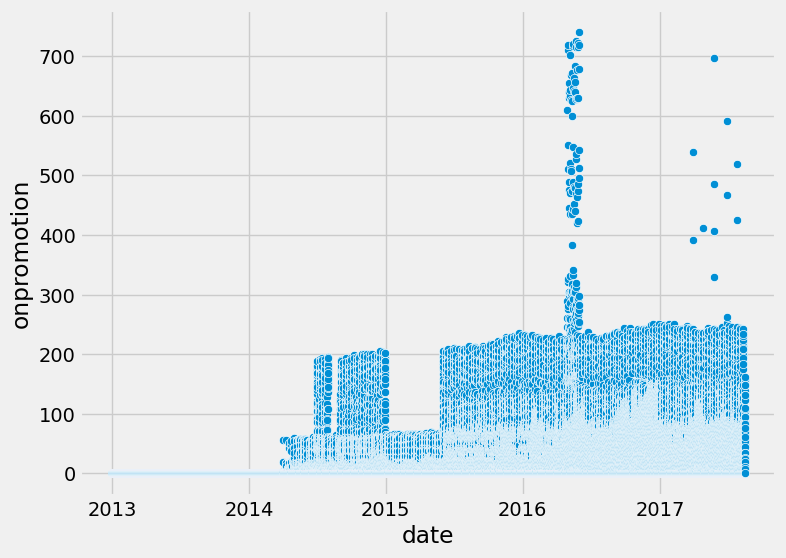

In [123]:
plt.figure(figsize=(8,6))
sns.scatterplot(train['onpromotion']) # train ['sales']

# FEATURE ENGINEERING 

Here we identify issues with our data , Then solve the issues therein 

**From the EDA , and univariate and bivariate analysis we have already identifies relevant and "irrelevant data" in view of our business objectives.**

1. Remove , create new features from our dataset

2. identifying and handle duplicate records

3. filling in missing values, and handling outliers

       encoding missing categorical data, filling     in     missing numerical values.
4. converting the data into a format that is more suitable for training, I.e Date column to datetime format etc. This can include normalizing numerical data, creating dummy variables





In [124]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


**1. Remove / Create new features from our dataset**

In [125]:
# Look at all columns , To identify features to add and which features to remove 

train5.head(0).T

""
date
id
store_nbr
family
sales
onpromotion
type_x
locale
locale_name
description


In [126]:
test.head(0).T

date
id
store_nbr
family
onpromotion


In [127]:
train6 = train5.copy()

In [128]:
print ('Train 6' ,train6.shape)

print ('Train 5',train5.shape)

Train 6 (3054348, 17)
Train 5 (3054348, 17)


In [129]:
# Check if it will return a boolean False 

are_equal = train5.equals(train6)

# Printing the result
print(are_equal)

True


In [130]:
test.head(0)

,id,store_nbr,family,onpromotion
date,,,,


In [131]:
# Dropping columns 


train5.drop([ 'type_x',  'type_y','locale', 'locale_name', 'description', 'cluster', 'state', 'city',
            'transferred',], axis=1, inplace=True)


In [132]:
train6.shape

(3054348, 17)

In [133]:
train5.shape

(3054348, 8)

In [134]:
initial_shape = (3054348, 5)

In [135]:
train5.head(0).T

""
date
id
store_nbr
family
sales
onpromotion
dcoilwtico
transactions


**Because we're late on time we will not add more features to our dataset, Since it will eventually demand more models**

## 2. identifying and handle duplicate records

In [136]:
duplicates = train5.duplicated()

print (duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
3054343    False
3054344    False
3054345    False
3054346    False
3054347    False
Length: 3054348, dtype: bool


In [137]:
# Dropping duplicate records
train5.drop_duplicates(inplace=True)

# Printing the dataframe without duplicates
print(train5)


              date       id  store_nbr                      family     sales  \
0       2013-01-01        0          1                  AUTOMOTIVE     0.000   
1       2013-01-01        1          1                   BABY CARE     0.000   
2       2013-01-01        2          1                      BEAUTY     0.000   
3       2013-01-01        3          1                   BEVERAGES     0.000   
4       2013-01-01        4          1                       BOOKS     0.000   
...            ...      ...        ...                         ...       ...   
3054343 2017-08-15  3000883          9                     POULTRY   438.133   
3054344 2017-08-15  3000884          9              PREPARED FOODS   154.553   
3054345 2017-08-15  3000885          9                     PRODUCE  2419.729   
3054346 2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3054347 2017-08-15  3000887          9                     SEAFOOD    16.000   

         onpromotion  dcoilwtico  trans

In [138]:
train5.shape

(3000888, 8)

In [139]:
initial_shape 

(3054348, 5)

In [140]:
dropped = 3054348 - 3000888

dropped 

53460

In [141]:
test.shape

(28512, 4)

In [142]:
train5.head(20)

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,93.14,NaN
1,2013-01-01,1,1,BABY CARE,0.0,0,93.14,NaN
2,2013-01-01,2,1,BEAUTY,0.0,0,93.14,NaN
3,2013-01-01,3,1,BEVERAGES,0.0,0,93.14,NaN
4,2013-01-01,4,1,BOOKS,0.0,0,93.14,NaN
5,2013-01-01,5,1,BREAD/BAKERY,0.0,0,93.14,NaN
6,2013-01-01,6,1,CELEBRATION,0.0,0,93.14,NaN
7,2013-01-01,7,1,CLEANING,0.0,0,93.14,NaN
8,2013-01-01,8,1,DAIRY,0.0,0,93.14,NaN
9,2013-01-01,9,1,DELI,0.0,0,93.14,NaN


In [143]:
train5.tail(20)

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
3054328,2017-08-15,3000868,9,GROCERY II,9.000,0,47.57,2155.0
3054329,2017-08-15,3000869,9,HARDWARE,1.000,0,47.57,2155.0
3054330,2017-08-15,3000870,9,HOME AND KITCHEN I,64.000,0,47.57,2155.0
3054331,2017-08-15,3000871,9,HOME AND KITCHEN II,61.000,2,47.57,2155.0
3054332,2017-08-15,3000872,9,HOME APPLIANCES,0.000,0,47.57,2155.0
3054333,2017-08-15,3000873,9,HOME CARE,373.000,6,47.57,2155.0
3054334,2017-08-15,3000874,9,LADIESWEAR,10.000,0,47.57,2155.0
3054335,2017-08-15,3000875,9,LAWN AND GARDEN,11.000,3,47.57,2155.0
3054336,2017-08-15,3000876,9,LINGERIE,6.000,0,47.57,2155.0
3054337,2017-08-15,3000877,9,"LIQUOR,WINE,BEER",25.000,2,47.57,2155.0


## 3. filling in missing values, and handling outliers encoding missing categorical data, filling in missing numerical values.

In [144]:
train5.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,transactions
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,2.143746e+06,2.755104e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,6.790519e+01,1.694602e+03
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,2.566373e+01,9.632810e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,5.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.640000e+01,1.046000e+03
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.338000e+01,1.393000e+03
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,9.580000e+01,2.079000e+03
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,8.359000e+03


In [145]:
# check for dtype if categorical or numerical

train6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   id            int64         
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   type_x        object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  transactions  float64       
 13  city          object        
 14  state         object        
 15  type_y        object        
 16  cluster       int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 419.5+ MB


In [146]:
# check for missing values

train5.isna().sum()

date                 0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico      857142
transactions    245784
dtype: int64

**1. Datetime column - correct format - no missing values**

**2. id column - correct format - no missing values**

**3. Store number - correct format - no missing values**

**4. Onpromotion - correct format - no missing values**

**5. dcoilwitco column - correct format - 857142 missing values**

**5. transactions column - correct format - 245784 missing values**A

In [147]:
test.head(5)

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


**Transaction Column , with our EDA analysis, We saw that it was evenly distributed**

**Because our test dataset does not have a transactions column, we also have to drop it so that the test and train dataset will have the same features , The only difference would be the one we are to trying to predict**

**This will prevent underfitting and overfitting of the data**

In [148]:
# Drop transactions column 

#train5.drop('transactions', axis=1, inplace=False)


**3. filling in missing values, and handling outliers encoding missing categorical data, filling in missing numerical values.**

In [149]:
train5.isna().sum()

date                 0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico      857142
transactions    245784
dtype: int64

a) dcoilwitco - impute missing values

In [150]:
train5['dcoilwtico'].isna().sum()

857142

In [151]:
# identify whether categorical or numerical 

train5['dcoilwtico'].value_counts

<bound method IndexOpsMixin.value_counts of 0          93.14
1          93.14
2          93.14
3          93.14
4          93.14
           ...  
3054343    47.57
3054344    47.57
3054345    47.57
3054346    47.57
3054347    47.57
Name: dcoilwtico, Length: 3000888, dtype: float64>

In [152]:
train5['dcoilwtico'].unique

<bound method Series.unique of 0          93.14
1          93.14
2          93.14
3          93.14
4          93.14
           ...  
3054343    47.57
3054344    47.57
3054345    47.57
3054346    47.57
3054347    47.57
Name: dcoilwtico, Length: 3000888, dtype: float64>

In [153]:
# use ffill 

train5['dcoilwtico'].fillna( method = 'ffill', inplace = True)

In [154]:
# Check if changes have effected 

train5['dcoilwtico'].isna().sum()

0

In [155]:
train6.head(30)

,date,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
2,2013-01-01,2,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
3,2013-01-01,3,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
4,2013-01-01,4,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
5,2013-01-01,5,1,BREAD/BAKERY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
6,2013-01-01,6,1,CELEBRATION,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
7,2013-01-01,7,1,CLEANING,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
8,2013-01-01,8,1,DAIRY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13
9,2013-01-01,9,1,DELI,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,NaN,Quito,Pichincha,D,13


In [156]:
# Use the backfill and forward fill

train6.fillna(method='backfill', inplace=True)
train6.fillna(method='ffill', inplace=True)

**b) transactions missing columns 24578**


In [157]:
train5['transactions'].isna().sum()

245784

In [158]:
train5['transactions']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
3054343    2155.0
3054344    2155.0
3054345    2155.0
3054346    2155.0
3054347    2155.0
Name: transactions, Length: 3000888, dtype: float64

In [159]:
train5['transactions'].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: transactions, dtype: float64

In [160]:
train5['transactions'].tail(30)

3054318    2155.0
3054319    2155.0
3054320    2155.0
3054321    2155.0
3054322    2155.0
3054323    2155.0
3054324    2155.0
3054325    2155.0
3054326    2155.0
3054327    2155.0
3054328    2155.0
3054329    2155.0
3054330    2155.0
3054331    2155.0
3054332    2155.0
3054333    2155.0
3054334    2155.0
3054335    2155.0
3054336    2155.0
3054337    2155.0
3054338    2155.0
3054339    2155.0
3054340    2155.0
3054341    2155.0
3054342    2155.0
3054343    2155.0
3054344    2155.0
3054345    2155.0
3054346    2155.0
3054347    2155.0
Name: transactions, dtype: float64

In [161]:
train5['transactions'].fillna(method='backfill', inplace=True)
train5['transactions'].fillna(method='ffill', inplace=True)

In [162]:
train5['transactions'].isna().sum()

0

**4. converting the data into a format that is more suitable for training, I.e Date column to datetime format etc. This can include normalizing numerical data, creating dummy variables**

In [163]:
print ('train columns ', train5.head(0).T)

print ('\ntest columns ', test.head(0).T)

train columns  Empty DataFrame
Columns: []
Index: [date, id, store_nbr, family, sales, onpromotion, dcoilwtico, transactions]

test columns  Empty DataFrame
Columns: []
Index: [id, store_nbr, family, onpromotion]


In [164]:
test.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [165]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,93.14,770.0
1,2013-01-01,1,1,BABY CARE,0.0,0,93.14,770.0
2,2013-01-01,2,1,BEAUTY,0.0,0,93.14,770.0
3,2013-01-01,3,1,BEVERAGES,0.0,0,93.14,770.0
4,2013-01-01,4,1,BOOKS,0.0,0,93.14,770.0


**We might later drop dcoilwtco and transactions**

# CORRECTING OUR DATASET TO PREVENT A SINGLE DAY BEING IN MULTIPLE ROWS , 

1. GROUPBY THE TRAIN DATASET 

In [166]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,93.14,770.0
1,2013-01-01,1,1,BABY CARE,0.0,0,93.14,770.0
2,2013-01-01,2,1,BEAUTY,0.0,0,93.14,770.0
3,2013-01-01,3,1,BEVERAGES,0.0,0,93.14,770.0
4,2013-01-01,4,1,BOOKS,0.0,0,93.14,770.0


In [167]:
train5.isna().sum()

date            0
id              0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
transactions    0
dtype: int64

In [168]:
# check if family is in the test set before grouping 

test.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


**Since family is in the test dataset, we will not remove it BUT when doing the grouping we will not group with it**

In [169]:
train5.head(2)

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,93.14,770.0
1,2013-01-01,1,1,BABY CARE,0.0,0,93.14,770.0


In [170]:
grouped_df = train5.groupby(['date']).agg({'sales': 'sum',
                                          
                                           }
  )

In [171]:
grouped_df.head()

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


In [172]:
print ( 'test set columns ', test.head(0))

print ('train set columns', train5.head(0))

test set columns  Empty DataFrame
Columns: [id, store_nbr, family, onpromotion]
Index: []
train set columns Empty DataFrame
Columns: [date, id, store_nbr, family, sales, onpromotion, dcoilwtico, transactions]
Index: []


In [173]:
remember = 'in the training set we will have a different training set without dcoilwtico, transactions column, and/ or we will have a different test set with dcoilwtico , transactions merged together'

# TEST 1 - Without transactions and witout dcoilwitc0

In [174]:
test.head(
    
)

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


# TEST 2 - With transactions and with dcoilwitch

In [175]:
# create a copy first of the training set 

test_2 = test.copy()

**a) Merge transactions**

In [176]:
transactions.head(0)

,store_nbr,transactions
date,,


In [177]:
test.head(0)

,id,store_nbr,family,onpromotion
date,,,,


In [178]:
test_ = test_2.merge( transactions.reset_index(), on = 'store_nbr', how = 'left')

In [179]:
test_.head(0)

,id,store_nbr,family,onpromotion,date,transactions


**b) merge dcoilwtico**

In [180]:
test_.head(0)

,id,store_nbr,family,onpromotion,date,transactions


In [181]:
duplicates = oil.duplicated(subset='dcoilwtico')

duplicates

date
2013-01-01    False
2013-01-02     True
2013-01-03    False
2013-01-04    False
2013-01-07    False
              ...  
2017-08-25     True
2017-08-28     True
2017-08-29     True
2017-08-30    False
2017-08-31    False
Length: 1218, dtype: bool

In [182]:
# deal with duplicates 

oil2 = oil.copy()

In [183]:
OIL = oil2.drop_duplicates()

OIL.head()

,dcoilwtico
date,
2013-01-01,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21


# CONVERT CAREGORICAL COLUMNS INTO A NON NUMERIC VARIABLE 

In [184]:


# importing the encoding modulle

from sklearn.preprocessing import LabelEncoder





In [185]:
# create an instance of the encoder 

le = LabelEncoder()



In [186]:
# Check to know which columns are categorical and which ones are not 

# train

In [187]:
train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3054347
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   id            int64         
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   dcoilwtico    float64       
 7   transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 206.1+ MB


In [188]:
# convert family to continuous 

train5['family'] = le.fit_transform(train5['family'])

In [189]:
# Check the test

test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   store_nbr    28512 non-null  int64 
 2   family       28512 non-null  object
 3   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [190]:
# convert family to continuous 

test['family'] = le.fit_transform(test['family'])

In [191]:
## Check if the changes have taken effect

In [192]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           28512 non-null  int64
 1   store_nbr    28512 non-null  int64
 2   family       28512 non-null  int64
 3   onpromotion  28512 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


In [193]:
train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3054347
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   id            int64         
 2   store_nbr     int64         
 3   family        int64         
 4   sales         float64       
 5   onpromotion   int64         
 6   dcoilwtico    float64       
 7   transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 206.1 MB


In [194]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,2013-01-01,0,1,0,0.0,0,93.14,770.0
1,2013-01-01,1,1,1,0.0,0,93.14,770.0
2,2013-01-01,2,1,2,0.0,0,93.14,770.0
3,2013-01-01,3,1,3,0.0,0,93.14,770.0
4,2013-01-01,4,1,4,0.0,0,93.14,770.0


In [195]:
test.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,0,0
2017-08-16,3000889,1,1,0
2017-08-16,3000890,1,2,2
2017-08-16,3000891,1,3,20
2017-08-16,3000892,1,4,0


In [196]:
train5.shape

(3000888, 8)

In [197]:
train5.head(2)

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,2013-01-01,0,1,0,0.0,0,93.14,770.0
1,2013-01-01,1,1,1,0.0,0,93.14,770.0


In [198]:
oil.head(0)

,dcoilwtico
date,


In [199]:
transactions.head(0)

,store_nbr,transactions
date,,


In [200]:
test.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,0,0
2017-08-16,3000889,1,1,0
2017-08-16,3000890,1,2,2
2017-08-16,3000891,1,3,20
2017-08-16,3000892,1,4,0


# PREPARE OUR COMBINED DATASET

### 1) merge both the train and test

In [201]:
new_df = pd.concat([train5, test], sort=True)

new_df

,date,dcoilwtico,family,id,onpromotion,sales,store_nbr,transactions
0,2013-01-01,93.14,0,0,0,0.0,1,770.0
1,2013-01-01,93.14,1,1,0,0.0,1,770.0
2,2013-01-01,93.14,2,2,0,0.0,1,770.0
3,2013-01-01,93.14,3,3,0,0.0,1,770.0
4,2013-01-01,93.14,4,4,0,0.0,1,770.0
...,...,...,...,...,...,...,...,...
2017-08-31 00:00:00,NaT,NaN,28,3029395,1,NaN,9,NaN
2017-08-31 00:00:00,NaT,NaN,29,3029396,0,NaN,9,NaN
2017-08-31 00:00:00,NaT,NaN,30,3029397,1,NaN,9,NaN
2017-08-31 00:00:00,NaT,NaN,31,3029398,9,NaN,9,NaN


In [202]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029400 entries, 0 to 2017-08-31 00:00:00
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   dcoilwtico    float64       
 2   family        int64         
 3   id            int64         
 4   onpromotion   int64         
 5   sales         float64       
 6   store_nbr     int64         
 7   transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 208.0+ MB


### 2) Remove na() records

In [203]:
new_df.isna().sum()

date            28512
dcoilwtico      28512
family              0
id                  0
onpromotion         0
sales           28512
store_nbr           0
transactions    28512
dtype: int64

In [204]:
new_df2 = new_df.dropna()

In [205]:
new_df2.isna().sum()

date            0
dcoilwtico      0
family          0
id              0
onpromotion     0
sales           0
store_nbr       0
transactions    0
dtype: int64

### 4) Encode Categorical column

In [206]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance 

encod = OneHotEncoder()

The non numeric categorigal feature **FAMILY** has already been encoded in the cells above . 

### 5) Reset index to be the date column

In [207]:
new_df2.head()

,date,dcoilwtico,family,id,onpromotion,sales,store_nbr,transactions
0,2013-01-01,93.14,0,0,0,0.0,1,770.0
1,2013-01-01,93.14,1,1,0,0.0,1,770.0
2,2013-01-01,93.14,2,2,0,0.0,1,770.0
3,2013-01-01,93.14,3,3,0,0.0,1,770.0
4,2013-01-01,93.14,4,4,0,0.0,1,770.0


In [208]:
new_df2.set_index('date', inplace=True)

In [209]:
new_df2.head()

,dcoilwtico,family,id,onpromotion,sales,store_nbr,transactions
date,,,,,,,
2013-01-01,93.14,0,0,0,0.0,1,770.0
2013-01-01,93.14,1,1,0,0.0,1,770.0
2013-01-01,93.14,2,2,0,0.0,1,770.0
2013-01-01,93.14,3,3,0,0.0,1,770.0
2013-01-01,93.14,4,4,0,0.0,1,770.0


### 6) Scale our data before splitting

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler = StandardScaler()

In [212]:
scaled_df =scaler.fit_transform(new_df2)

### 6) Splitting Data into training and testing

In [213]:
# Import splitting module

from sklearn.model_selection import train_test_split

In [214]:
# prepare target and features 

x = new_df2.drop('sales', axis=1) # Our features

y = new_df2['sales'] # Our target, what we are trying to predict

In [215]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

In [216]:
print ('x_train shape is' , x_train.shape)
print ('x_test shape is' , x_test.shape)
print ('y_train shape is' , y_train.shape)
print ('x_test shape is' , y_train.shape)

x_train shape is (2400710, 6)
x_test shape is (600178, 6)
y_train shape is (2400710,)
x_test shape is (2400710,)


### 7) Scale the data to :speedup the process, improving model perfomance 

In [217]:
x_train_scaled = scaler.fit_transform(x_train)

In [218]:
x_test_scaled = scaler.fit_transform(x_test)

In [219]:
x_train_scaled

array([[-0.9910499 , -1.6802582 ,  1.61861458, -0.04932238,  1.12281663,
         1.767741  ],
       [-0.66382855,  1.3652836 ,  0.17455297, -0.21289136,  1.25113593,
         2.83609827],
       [-1.19945874,  1.3652836 ,  0.51723316, -0.21289136, -0.0962167 ,
        -1.05915125],
       ...,
       [-0.68369556, -1.6802582 ,  0.84132676, -0.21289136,  1.63609383,
        -0.33850908],
       [-0.6104603 , -1.36520215,  1.46383098,  1.013876  ,  0.35290084,
        -0.82278902],
       [-0.73161011,  0.94520887,  0.82981231, -0.04932238, -0.28869565,
        -0.78392056]])

In [220]:
# y_train_scaled = scaler.fit_transform(y_train)

In [221]:
x_train

,dcoilwtico,family,id,onpromotion,store_nbr,transactions
date,,,,,,
2017-06-21,42.48,0,2902383,2,45,3345.0
2015-07-18,50.88,29,1651514,0,47,4362.0
2016-01-02,37.13,29,1948349,0,26,654.0
2017-06-16,44.73,2,2893871,1,7,2161.0
2017-06-02,47.68,32,2867501,0,16,708.0
...,...,...,...,...,...,...
2015-08-10,44.94,8,1692743,0,54,902.0
2016-08-18,48.20,31,2356330,0,23,925.0
2016-06-07,50.37,0,2229084,0,53,1340.0


In [222]:
TRAIN_1 = x_train.copy()

# REGRESSION SERIES MODELLING 

# MODEL 1 

# LINEAR REGRESSION 

In [223]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

1. Fitting the model 

In [224]:
model.fit(x_train, y_train)

LinearRegression()

2. predicting values values  

In [225]:
Test = x_test.copy()

In [226]:
predicted_sales = model.predict(Test)

In [227]:
# print predicted sales 

print(predicted_sales)

[2919.72055431  204.41820842  155.91772719 ...  269.90805826  462.62585776
  874.47584767]


In [228]:
print(y_test)

date
2016-10-28    2576.000
2017-04-03       0.000
2014-11-16     357.354
2014-11-24       5.000
2013-10-24       0.000
                ...   
2017-01-25       3.000
2014-11-07     258.000
2013-01-08     292.884
2014-10-01     738.464
2016-12-23    1412.923
Name: sales, Length: 600178, dtype: float64


3. Visualize the predicted against the test

<Axes: xlabel='sales', ylabel='sales'>

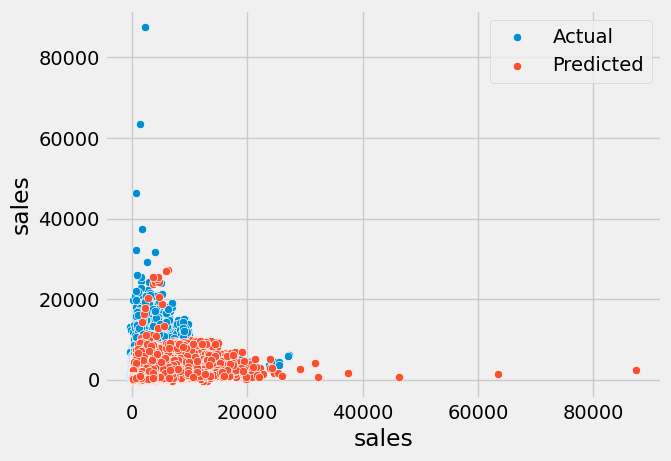

In [229]:
fig, ax = plt.subplots()

sns.scatterplot(x=predicted_sales , y=y_test , label='Actual')
sns.scatterplot(x=y_test , y=predicted_sales, label='Predicted' )

#sns.scatterplot(x=y_test, y=y_test) 

4. Calculate the evaluation metrics

In [230]:
from math import sqrt 


from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error,mean_absolute_error, accuracy_score 

In [231]:
r2_score( predicted_sales, y_test)

-2.3848769911730034

In [232]:
r2 = r2_score( y_test, predicted_sales)
mse =mean_squared_error( y_test, predicted_sales)
mae = mean_absolute_error( y_test, predicted_sales)


In [233]:
metrics = pd.DataFrame ([['Linear_Regression', r2, mse, mae]], columns=['model', 'R2_SCORE', 'MSE', 'MAE'])

In [234]:
metrics

,model,R2_SCORE,MSE,MAE
0,Linear_Regression,0.23398,952018.216092,421.55915


# MODEL 2 

# RANDOM FOREST

In [235]:
from sklearn.ensemble import RandomForestRegressor

In [236]:
# train the random forest regressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)


**NB** Due to RAM and processing power we have set the trees to 10, Otherwise in an ideal case the more the better 

In [237]:

rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Make predictions 

In [303]:
y_pred = rf_reg.predict(x_test)

In [304]:
y_pred_R = rf_reg.predict(x_test)

In [239]:
print(y_pred)

[1751.7         0.        330.2287   ...  285.488102  682.2134
 1351.549097]


Make visualization of the prediction

<Axes: xlabel='sales', ylabel='sales'>

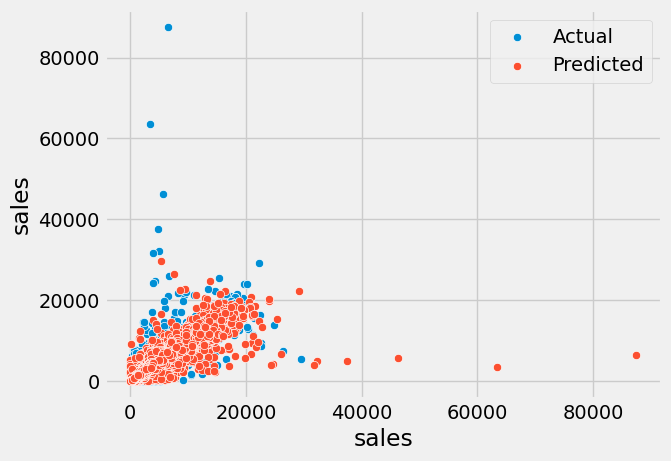

In [240]:
fig, ax = plt.subplots()

sns.scatterplot(x=y_pred , y=y_test , label='Actual')
sns.scatterplot(x=y_test , y=y_pred, label='Predicted' )


This is most probably because we set a low number of trees to learn from

Evaluation

In [241]:
r2_ = r2_score( y_test, y_pred)
mse_ =mean_squared_error( y_test, y_pred)
mae_ = mean_absolute_error( y_test, y_pred)

In [242]:
metrics2 = pd.DataFrame ([['Random Forest', r2_, mse_, mae_]], columns=['model', 'R2_SCORE', 'MSE', 'MAE'])

metrics = metrics.append(metrics2, ignore_index=True)

In [243]:
metrics

,model,R2_SCORE,MSE,MAE
0,Linear_Regression,0.233980,952018.216092,421.559150
1,Random Forest,0.937429,77763.413172,54.922638


# MODEL 3


# Gradient boosting regressor

In [244]:
from sklearn.ensemble import GradientBoostingRegressor

In [245]:
# Create an instance 

gb_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)



Train it on our data

In [246]:
# Train the model on the training data
gb_model.fit(x_train_scaled, y_train)


GradientBoostingRegressor(n_estimators=10, random_state=42)

Make Predictions 

In [247]:
y_pred = gb_model.predict(x_test_scaled)

In [305]:
y_pred_X = gb_model.predict(x_test_scaled)

In [248]:
print(y_pred)


[1647.21805988  280.23543993  639.94197563 ...  280.23543993  704.88566113
  706.18664588]


Visualize the prediction

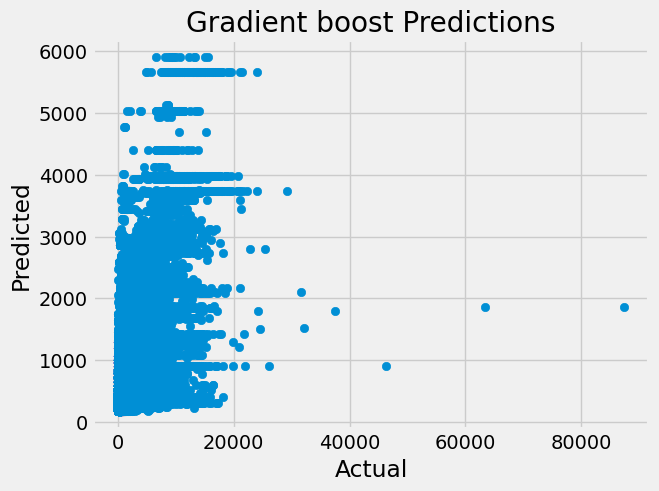

In [249]:
# plot predicted vs. actual values
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient boost Predictions')
plt.show()

<Axes: xlabel='sales', ylabel='sales'>

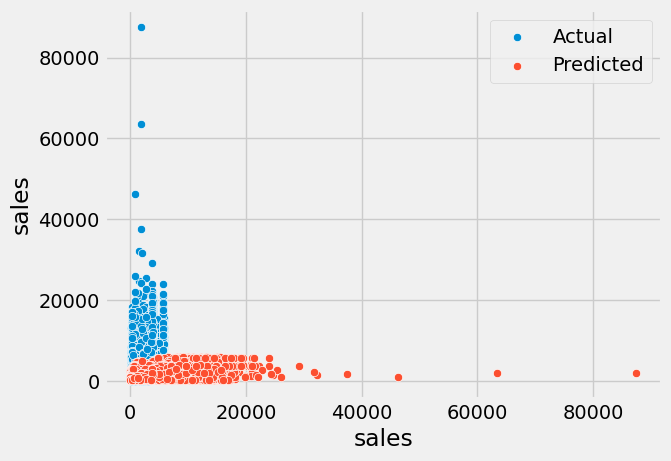

In [250]:
sns.scatterplot(x=y_pred , y=y_test , label='Actual')
sns.scatterplot(x=y_test , y=y_pred, label='Predicted' )

Evaluate the metrics 

In [251]:
R2_ = r2_score( y_test, y_pred)
Mse_ =mean_squared_error( y_test, y_pred)
Mae_ = mean_absolute_error( y_test, y_pred)

In [252]:
metrics3 = pd.DataFrame ([['Support Vector ', R2_, Mse_, Mae_]], columns=['model', 'R2_SCORE', 'MSE', 'MAE'])

metrics = metrics.append(metrics3, ignore_index=True)

In [253]:
metrics

,model,R2_SCORE,MSE,MAE
0,Linear_Regression,0.233980,952018.216092,421.559150
1,Random Forest,0.937429,77763.413172,54.922638
2,Support Vector,0.350954,806641.757242,386.584585


# MODEL 4

# XGBoost Regression

In [254]:
from xgboost import XGBRegressor

In [255]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

Fit the instance to our data 

In [256]:
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predict values 

In [257]:
y_pred = xgb.predict(x_test)


In [ ]:
y_pred = xgb.predict(x_test)


In [307]:
y_predGB = xgb.predict(x_test)


In [258]:
print(y_pred)

[1557.4622    231.07652   544.80444  ...  110.602425  712.50385
  746.685   ]


Visualization

<Axes: xlabel='sales', ylabel='sales'>

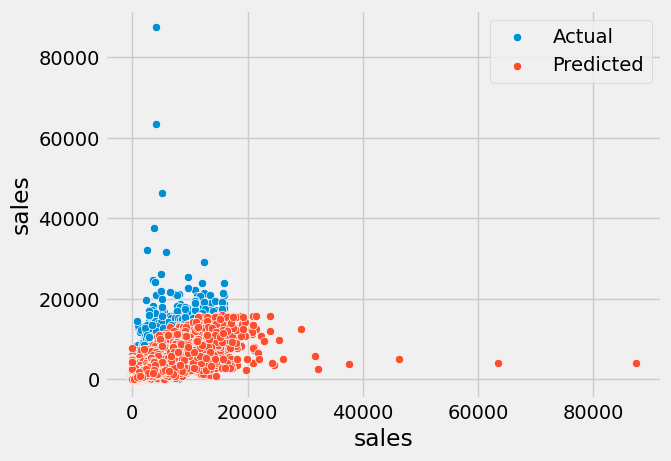

In [259]:
sns.scatterplot(x=y_pred , y=y_test , label='Actual')
sns.scatterplot(x=y_test , y=y_pred, label='Predicted' )

Evaluate performance parameters 

In [260]:
R21_ = r2_score( y_test, y_pred)
Mse1_ =mean_squared_error( y_test, y_pred)
Mae1_ = mean_absolute_error( y_test, y_pred)

In [261]:
metrics4 = pd.DataFrame ([['XBOOST ', R21_, Mse1_, Mae1_]], columns=['model', 'R2_SCORE', 'MSE', 'MAE'])

metrics = metrics.append(metrics4, ignore_index=True)

In [262]:
metrics

,model,R2_SCORE,MSE,MAE
0,Linear_Regression,0.233980,952018.216092,421.559150
1,Random Forest,0.937429,77763.413172,54.922638
2,Support Vector,0.350954,806641.757242,386.584585
3,XBOOST,0.772901,282241.752238,194.316372


We can add the number of trees in support vector , then evaluate the R2 score 

# MODEL 5 

# gradient boosting 2 (increasing n estimators)

In [263]:
# Create an instance 

gb_model2 = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)



Train our data

In [264]:
# Train the model on the training data
gb_model2.fit(x_train_scaled, y_train)


GradientBoostingRegressor(n_estimators=50, random_state=42)

Make predictions 

In [265]:
y_pred = gb_model2.predict(x_test_scaled)

Visualize the predictions 

<Axes: xlabel='sales', ylabel='sales'>

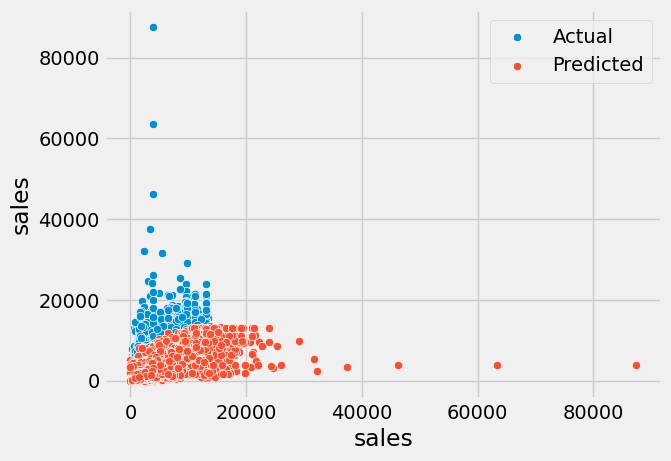

In [266]:

sns.scatterplot(x=y_pred , y=y_test , label='Actual')
sns.scatterplot(x=y_test , y=y_pred, label='Predicted' )


Evaluate metrics

In [267]:
R22_ = r2_score( y_test, y_pred)
Mse2_ =mean_squared_error( y_test, y_pred)
Mae2_ = mean_absolute_error( y_test, y_pred)

In [268]:
metrics5 = pd.DataFrame ([['XBOOST2 ', R22_, Mse2_, Mae2_]], columns=['model', 'R2_SCORE', 'MSE', 'MAE'])

metrics = metrics.append(metrics4, ignore_index=True)

In [269]:
metrics

,model,R2_SCORE,MSE,MAE
0,Linear_Regression,0.233980,952018.216092,421.559150
1,Random Forest,0.937429,77763.413172,54.922638
2,Support Vector,0.350954,806641.757242,386.584585
3,XBOOST,0.772901,282241.752238,194.316372
4,XBOOST,0.772901,282241.752238,194.316372


**EVEN AFTER INCREASING THE NUMBER OF ESTIMATORS DOESN'T IMPROVE OUR MODEL**

# 6) MODEL 6

# AUTOREGRESSIVE 

In [270]:
from statsmodels.tsa.ar_model import AutoReg 

In [271]:
train5.head()

,date,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,2013-01-01,0,1,0,0.0,0,93.14,770.0
1,2013-01-01,1,1,1,0.0,0,93.14,770.0
2,2013-01-01,2,1,2,0.0,0,93.14,770.0
3,2013-01-01,3,1,3,0.0,0,93.14,770.0
4,2013-01-01,4,1,4,0.0,0,93.14,770.0


In [272]:
scaled_df

array([[ 0.98231237, -1.6803361 , -1.73205023, ..., -0.32466111,
        -1.70026736, -0.93707261],
       [ 0.98231237, -1.57531509, -1.73204908, ..., -0.32466111,
        -1.70026736, -0.93707261],
       [ 0.98231237, -1.47029409, -1.73204792, ..., -0.32466111,
        -1.70026736, -0.93707261],
       ...,
       [-0.79297201,  1.47029409,  1.73204792, ...,  1.87110513,
        -1.1869791 ,  0.51731988],
       [-0.79297201,  1.57531509,  1.73204908, ..., -0.21486051,
        -1.1869791 ,  0.51731988],
       [-0.79297201,  1.6803361 ,  1.73205023, ..., -0.31014203,
        -1.1869791 ,  0.51731988]])

In [273]:
# Create an instance of the class

model = AutoReg(train5['sales'], lags = 5).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [274]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  sales   No. Observations:              3000888
Model:                     AutoReg(5)   Log Likelihood           -25218602.183
Method:               Conditional MLE   S.D. of innovations           1080.078
Date:                Mon, 01 May 2023   AIC                       50437218.366
Time:                        13:34:30   BIC                       50437308.767
Sample:                             5   HQIC                      50437242.198
                              3000888                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        273.4747      0.768    355.934      0.000     271.969     274.981
sales.L1      -0.0374      0.001    -65.611      0.000      -0.039      -0.036
sales.L2       0.0280      0.001     49.452      0.0

Make predictions 

In [275]:
pred = model.predict ( start=len(train5), end=len(train5)+len(test)-1 , dynamic = False) #type='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [306]:
pred_AR = model.predict ( start=len(train5), end=len(train5)+len(test)-1 , dynamic = False) #type='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [276]:
print(pred)

3000888    288.449110
3000889    582.759665
3000890    640.611971
3000891    277.381868
3000892    301.554623
              ...    
3029395    357.776667
3029396    357.776667
3029397    357.776667
3029398    357.776667
3029399    357.776667
Length: 28512, dtype: float64


Visualize predictions against test

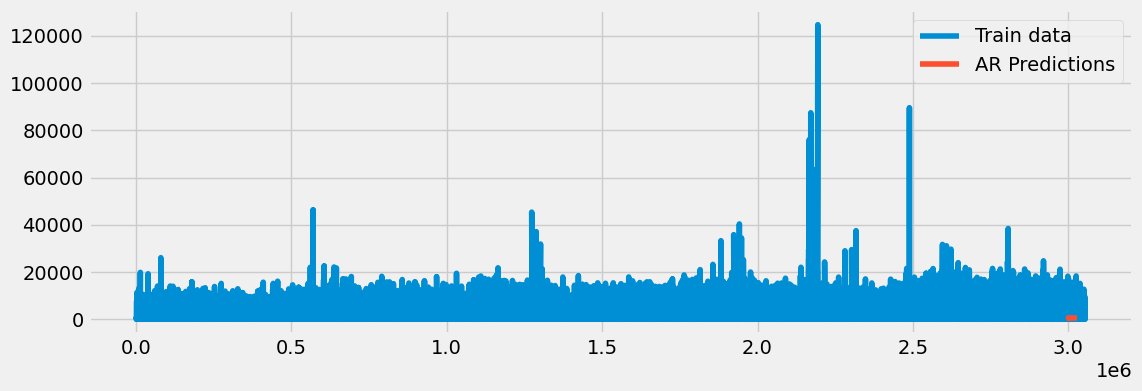

In [277]:
plt.figure(figsize=(12,4))
plt.plot(train5['sales'], label='Train data')
#plt.plot(test['sales'], label='Test data')
plt.plot(pred, label='AR Predictions')
plt.legend(loc='best')
plt.show()

Evaluate the model 


In [280]:
y_test.shape

(600178,)

In [281]:
pred.shape

(28512,)

In [291]:
y_train.shape

(2400710,)

In [292]:
# Get a sample of y_train same as pred

y_train_2 = y_train.copy()

y_train_2 = y_train_2[:28512]

Evaluate the model

In [295]:
R23_ = r2_score( y_train_2 , pred)
Mse3_ =mean_squared_error( y_train_2, pred)
Mae3_ = mean_absolute_error( y_train_2, pred)

store results in a df

In [296]:
metrics6 = pd.DataFrame ([['AR ', R22_, Mse3_, Mae3_]], columns=['model', 'R2_SCORE', 'MSE', 'MAE'])

metrics = metrics.append(metrics6, ignore_index=True)

In [297]:
metrics

,model,R2_SCORE,MSE,MAE
0,Linear_Regression,0.233980,9.520182e+05,421.559150
1,Random Forest,0.937429,7.776341e+04,54.922638
2,Support Vector,0.350954,8.066418e+05,386.584585
3,XBOOST,0.772901,2.822418e+05,194.316372
4,XBOOST,0.772901,2.822418e+05,194.316372
5,AR,0.699139,1.211640e+06,510.246890


# EVALUATION - UNDERSTANDING THE METRICS 

# A) r score  ( coefficient of determination )

In [ ]:
pd.concat([metrics.index.to_series(),metrics.iloc[:, 1] ], axis=1)

Although the **r_score** is not the only metric used for checking the accuracy of a model , We have employed it heavily here fot it measures the goodness of fit of the model to the data.


**ALSO** we have hot had many features , therefore it is Okay for us to use it for model evaluation


The r score ranging from 0 - 1 , The higher value indicating the best fit model for prediction. 
In this respect then the best model in descending order is ⁉

1. Random Forest

2. X Boost

3. AR Model

4. Support Vector 

5. Linear Regression 

In [298]:

best = pd.DataFrame(['random forest', 'x boost', 'support vector', 'linear regression'], columns=['r score ANALYSIS'])

best

,r score ANALYSIS
0,random forest
1,x boost
2,support vector
3,linear regression


# B) mean_squared_error 

In [299]:
pd.concat([metrics.index.to_series(),metrics.iloc[:, 2] ], axis=1)

,0,MSE
0,0,9.520182e+05
1,1,7.776341e+04
2,2,8.066418e+05
3,3,2.822418e+05
4,4,2.822418e+05
5,5,1.211640e+06


**What it is**

It is calculated by taking the average of the squared differences between the predicted and actual values of each data point.

**How to interprete**

MSE provides a measure of how well a model is able to approximate the true relationship between the **input features (x-values) / features** and the **output variable (y-value) / target variable**. 

A lower MSE indicates that the model is better at predicting the outcome variable, while a higher MSE indicates that the model is less accurate.


*The lower the MSE the better* -  A lower value of MSE indicates that the model's predictions are closer to the actual values.



**Interpretation**

Using  mse , the best model would be :
1. Random Forest

2. Xboost 

3. Suport Vector

4. Linear Regresion

In [300]:
best2 = pd.DataFrame(['random forest', 'x boost', 'support vector', 'linear regression'], columns=['MSE'])


best2

,MSE
0,random forest
1,x boost
2,support vector
3,linear regression


# 3) Mean Average Error 

In [301]:
metrics

,model,R2_SCORE,MSE,MAE
0,Linear_Regression,0.233980,9.520182e+05,421.559150
1,Random Forest,0.937429,7.776341e+04,54.922638
2,Support Vector,0.350954,8.066418e+05,386.584585
3,XBOOST,0.772901,2.822418e+05,194.316372
4,XBOOST,0.772901,2.822418e+05,194.316372
5,AR,0.699139,1.211640e+06,510.246890


**What it means**

It measures the average difference between the predicted and actual values of a continuous variable. A lower MAE indicates that the model is better at predicting the target variable.


A lower MAE indicates that the model is better at predicting the target variable.

This means, For this metric , the best model is 🇰

1. Random Forest 

2. X boost

3. Support vector 

4. Linear Regression

5. AR 

# RECOMENDATIONS 

**Best Top 3 Models so far:**

1. Random 

2. X Boost 

3. SVR

```
# This is formatted as code
```



In [312]:
import math 

import numpy as np

In [302]:
# GET THE MSLE FOR ALL 

from sklearn.metrics import mean_squared_error

In [309]:
mean_squared_log_error(y_train[:600178], y_pred_R)

14.319826859430737

Random Forset 

In [327]:
log_predicted = np.log(y_pred_R + 1)
log_actual = np.log(y_train[:600178] + 1)

In [328]:
squared_diff = (log_predicted - log_actual) ** 2


In [329]:
# Get mean of squared differences 
mean_squared_diff = np.mean(squared_diff)


In [330]:
# Calclulate rmsle and print 
rmsle = math.sqrt(mean_squared_diff)


In [331]:
print(rmsle)

3.784154708707182


# REDUCING THE RMSLE FOR OUR BEST MODEL 

In [337]:
import pandas as pd

df_preds = pd.DataFrame({
    'y_pred_R': y_pred_R[:600178],
    'y_pred_X': y_pred_X[:600178],
    'y_predGB': y_predGB[:600178],
    'y_true': y_train[:600178]
})


In [342]:
y_true_pos = df_preds['y_true']+1

In [347]:
msle_R = mean_squared_log_error(y_true_pos, df_preds['y_pred_R'])
msle_X = mean_squared_log_error(y_true_pos, df_preds['y_pred_X'])
#msle_GB = mean_squared_log_error(y_true_pos, df_preds['y_predGB'])

In [351]:
rmsle_R2 = np.sqrt(mean_squared_log_error(df_preds['y_true'], df_preds['y_pred_R']))
rmsle_X2 = np.sqrt(mean_squared_log_error(df_preds['y_true'], df_preds['y_pred_X']))
#rmsle_GB = np.sqrt(mean_squared_log_error(df_preds['y_true'], df_preds['y_predGB']))


In [354]:
w_R = 1 / rmsle_R2
w_X = 1 / rmsle_X2


total_w = w_R + w_X 

df_preds['ensemble'] = (w_R * df_preds['y_pred_R'] + 
                        w_X * df_preds['y_pred_X']  ) / total_w


In [355]:
rmsle_ensemble = np.sqrt(mean_squared_log_error(df_preds['y_true'], df_preds['ensemble']))


In [356]:
rmsle_ensemble

3.681577002751378

# REDUCING THE SECOND TIME 

In [359]:
w_R = 1 / rmsle_R2
w_X = 1 / rmsle_X2
w_R1 = 1 / rmsle_R
w_X1 = 1 / rmsle_X


total_w = w_R + w_X + w_R1 + w_X1

df_preds['ensemble'] = (w_R * df_preds['y_pred_R'] + 
                        w_X * df_preds['y_pred_X'] +
                        w_R1 * df_preds['y_pred_R'] + 
                        w_X1 * df_preds['y_pred_X']  ) / total_w


In [360]:
rmsle_ensemble = np.sqrt(mean_squared_log_error(df_preds['y_true'], df_preds['ensemble']))


In [361]:
rmsle_ensemble

3.681577002751378

# STILL FIXING HYPERPARAMETERS 